In [1]:
import wisc_ecephys_tools as wet
from wisc_ecephys_tools.sortings import get_subject_probe_list
from ecephys.wne.sglx.utils import load_singleprobe_sorting

In [2]:

def do_figure(subject, probe):
    
    sorting = load_singleprobe_sorting(
        wet.get_sglx_project("shared_sortings"),
        wet.get_sglx_subject(subject),
        "novel_objects_deprivation",
        "full",
        probe,
        wneAnatomyProject = wet.get_wne_project("shared_s3"),
        allow_no_sync_file=True,            
    ).refine_clusters(
        {"quality": {"good", "mua"}},
        include_nans=True,
    )

    import seaborn as sns

    fig, ax = plt.subplots(figsize=(20, 10), layout="constrained")
    properties = sorting.properties


    properties["structure info"] = properties.acronym + " (" + properties.structure + ")" 

    sns.histplot(properties, x="depth", hue="structure info", binwidth=20, ax=ax)


    structs = sorting.si_obj.get_annotation("structure_table")

    for row in structs.itertuples():
        ax.axvline(row.lo, color="grey")
        ax.axvline(row.hi, color="red")
    # plt.vlines(structs.hi.values, 0, 1, color="black")

    plt.suptitle(f"{subject}, {probe}, N={len(properties)}\n")
    plt.title(structs[["acronym", "lo", "hi"]].to_string())
    
    return fig

NameError: name 'sorting' is not defined

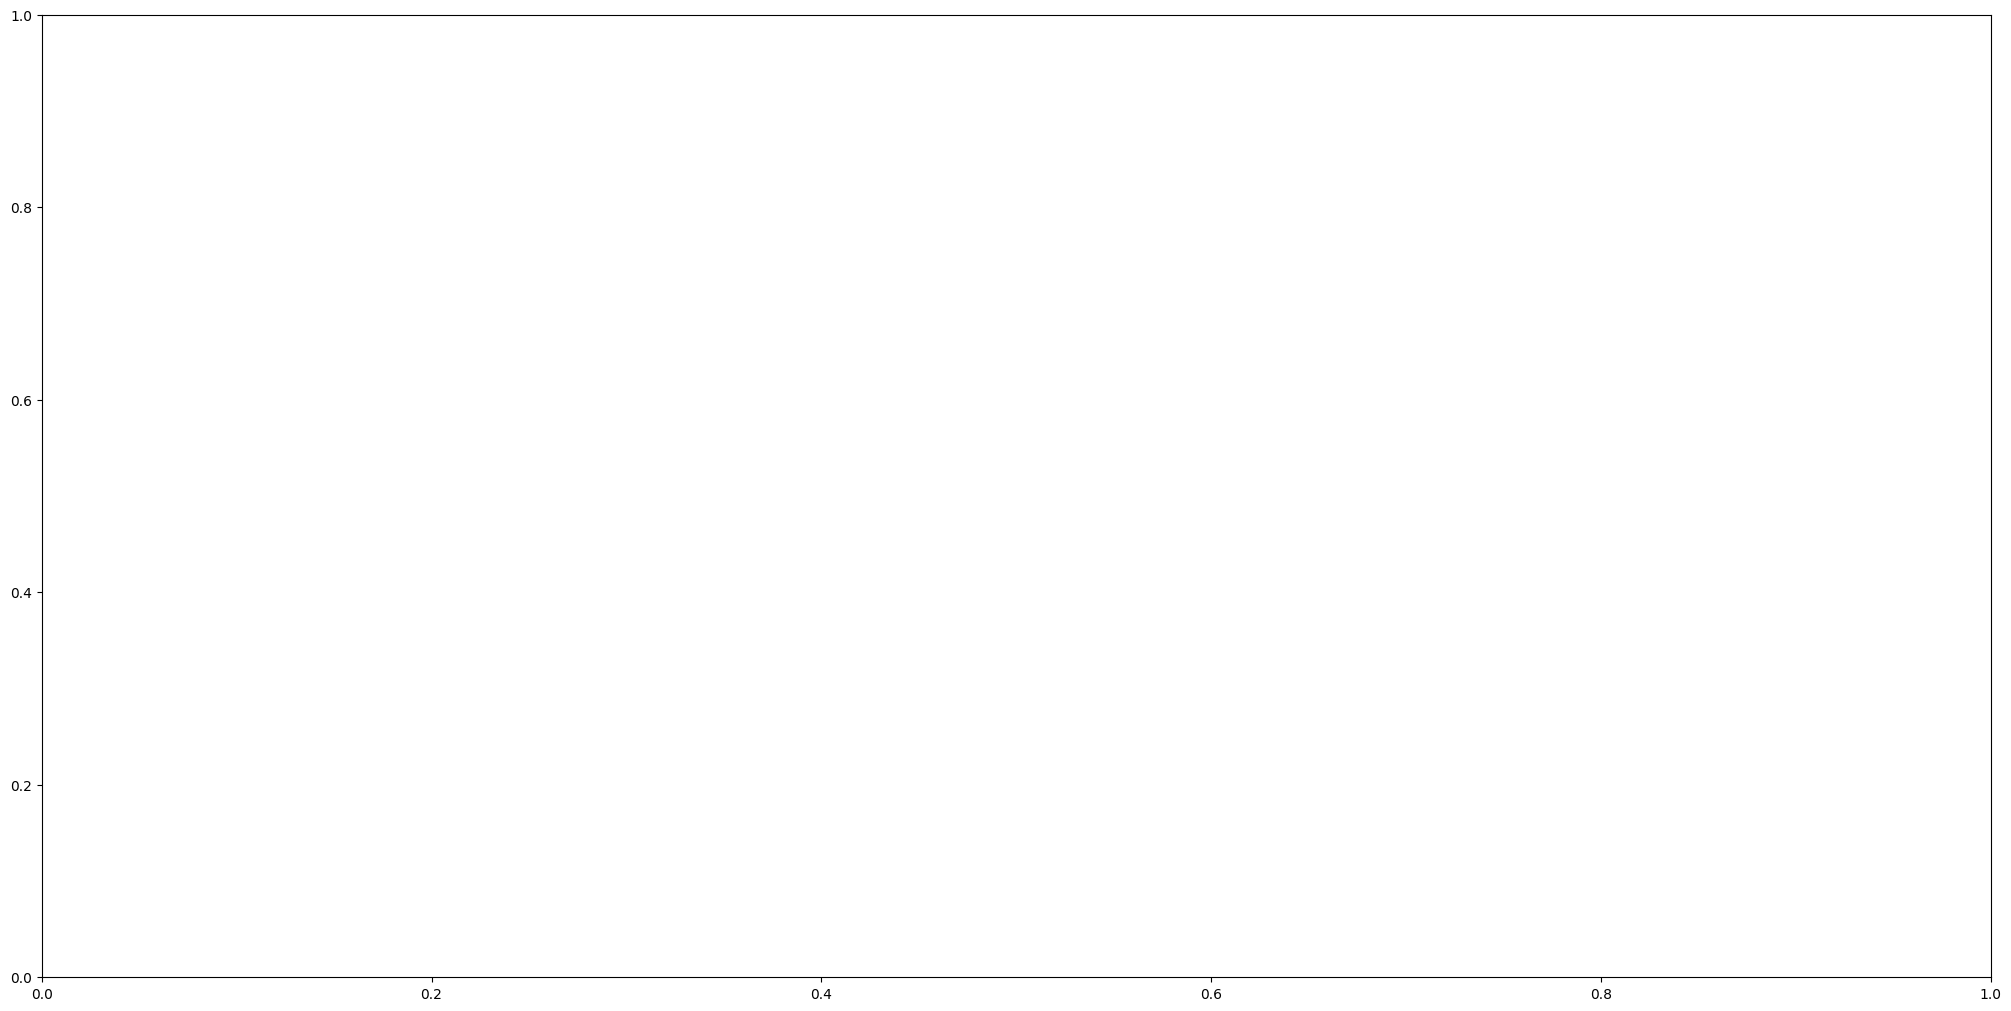

In [3]:
fig, ax = plt.subplots(figsize=(20, 10), layout="constrained")
properties = sorting.properties


properties["structure info"] = properties.acronym + " (" + properties.structure + ")" 

sns.histplot(properties, x="depth", hue="structure info", binwidth=20, ax=ax)


structs = sorting.si_obj.get_annotation("structure_table")

for row in structs.itertuples():
    ax.axvline(row.lo, color="grey")
    ax.axvline(row.hi, color="red")
# plt.vlines(structs.hi.values, 0, 1, color="black")

plt.suptitle(f"{subject}, {probe}\n")
plt.title(structs[["acronym", "lo", "hi"]].to_string())
    

quality: {'good', 'mua'} excludes 19 clusters.
19/281 clusters excluded by jointly applying filters. 262 remain.


TypeError: distplot() got an unexpected keyword argument 'hue'

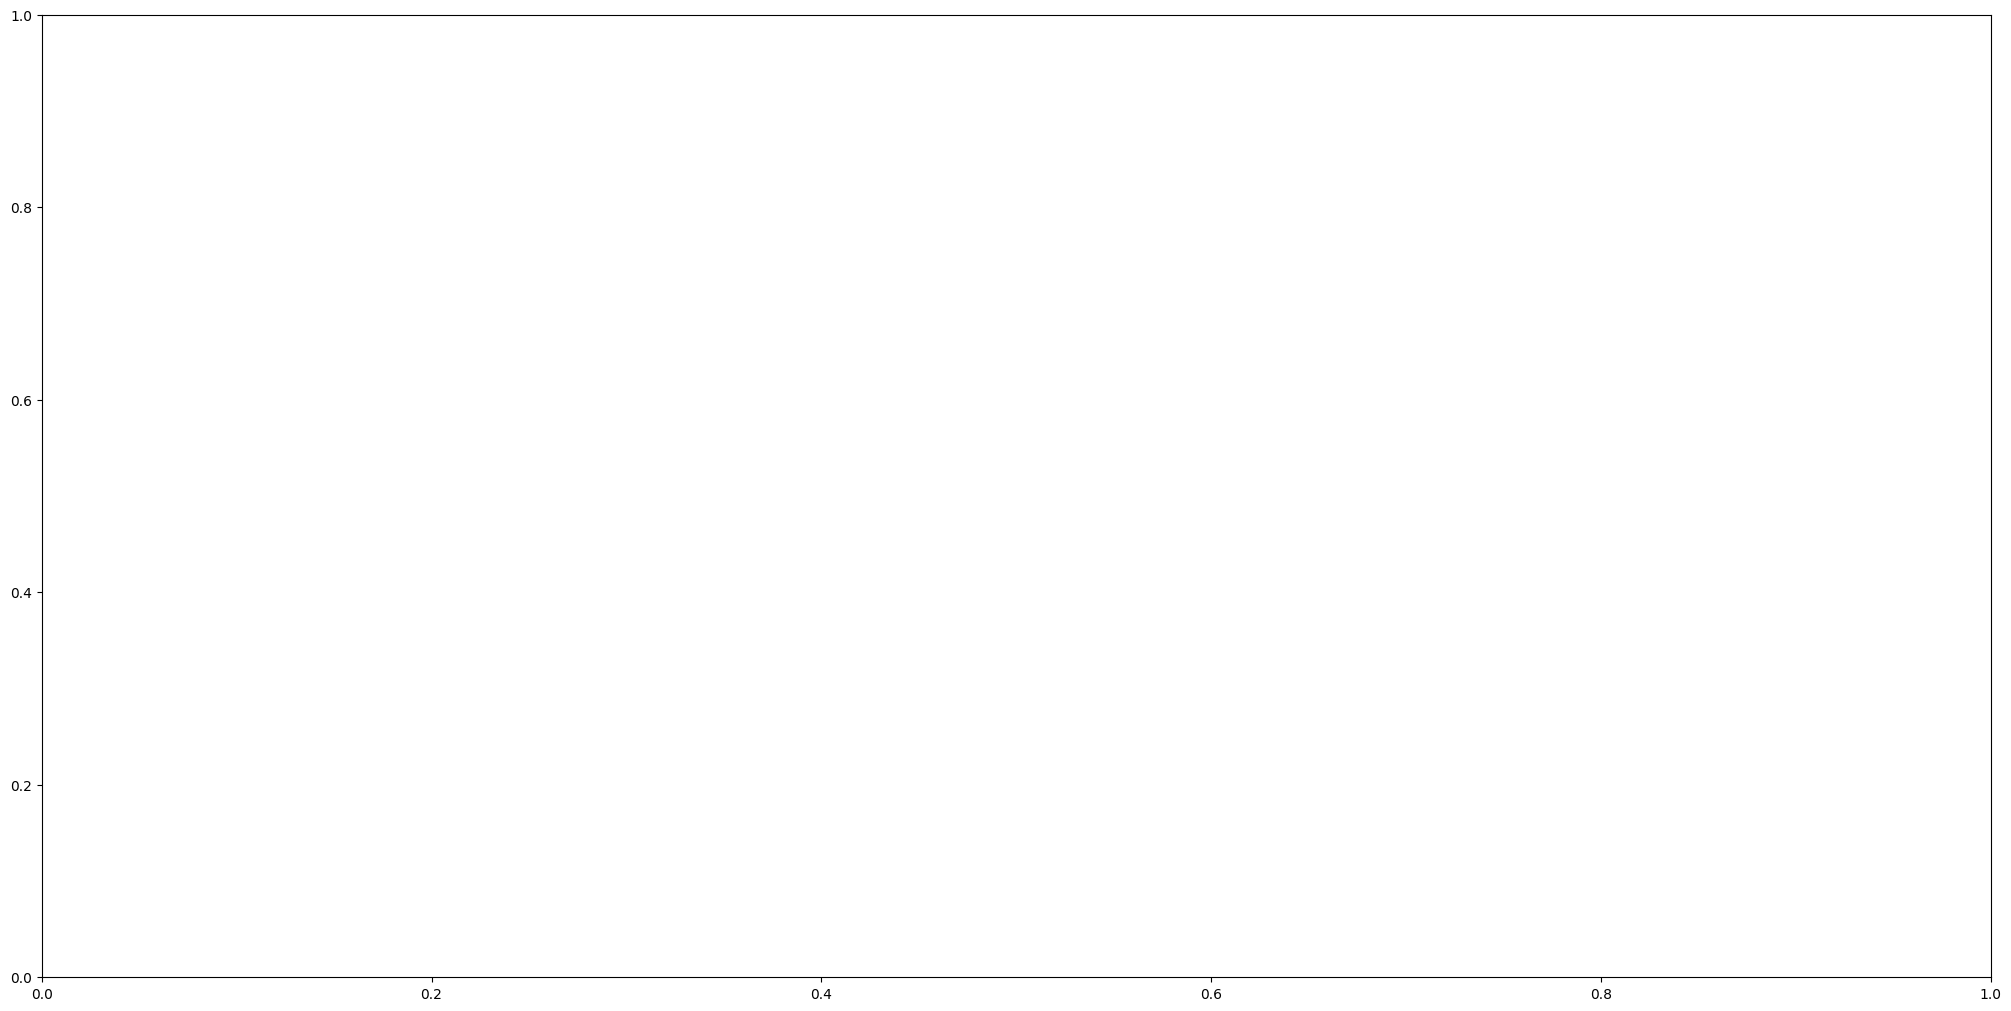

In [69]:
do_figure("CNPIX19-Otto", "imec0")

CNPIX10-Charles imec0
quality: {'good', 'mua'} excludes 98 clusters.
98/553 clusters excluded by jointly applying filters. 455 remain.
CNPIX10-Charles imec1
quality: {'good', 'mua'} excludes 138 clusters.
138/291 clusters excluded by jointly applying filters. 153 remain.
CNPIX11-Adrian imec0
quality: {'good', 'mua'} excludes 165 clusters.
165/360 clusters excluded by jointly applying filters. 195 remain.
CNPIX11-Adrian imec1
quality: {'good', 'mua'} excludes 52 clusters.
52/186 clusters excluded by jointly applying filters. 134 remain.
CNPIX12-Santiago imec0
quality: {'good', 'mua'} excludes 67 clusters.
67/484 clusters excluded by jointly applying filters. 417 remain.
CNPIX12-Santiago imec1
quality: {'good', 'mua'} excludes 84 clusters.
84/342 clusters excluded by jointly applying filters. 258 remain.
CNPIX13-Al imec0
quality: {'good', 'mua'} excludes 77 clusters.
77/130 clusters excluded by jointly applying filters. 53 remain.
CNPIX14-Francis imec1
quality: {'good', 'mua'} excludes 2

/home/tbugnon/projects/ecephys_dev/ecephys/ecephys/wne/projects.py:225: UserWarning: Could not find postprocessing dir. Ignoring metrics: /Volumes/npx_nfs/shared_s3/novel_objects_deprivation/full/CNPIX2-Segundo/sorting.imec0/postpro
  warnings.warn(


quality: {'good', 'mua'} excludes 194 clusters.
194/280 clusters excluded by jointly applying filters. 86 remain.
CNPIX4-Doppio imec0
quality: {'good', 'mua'} excludes 47 clusters.
47/326 clusters excluded by jointly applying filters. 279 remain.
CNPIX4-Doppio imec1
quality: {'good', 'mua'} excludes 224 clusters.
224/855 clusters excluded by jointly applying filters. 631 remain.
CNPIX5-Alessandro imec0
quality: {'good', 'mua'} excludes 17 clusters.
17/245 clusters excluded by jointly applying filters. 228 remain.
CNPIX6-Eugene imec0
quality: {'good', 'mua'} excludes 47 clusters.
47/270 clusters excluded by jointly applying filters. 223 remain.
CNPIX8-Allan imec0
quality: {'good', 'mua'} excludes 682 clusters.
682/1607 clusters excluded by jointly applying filters. 925 remain.
CNPIX9-Luigi imec0
quality: {'good', 'mua'} excludes 72 clusters.
72/146 clusters excluded by jointly applying filters. 74 remain.


/tmp/ipykernel_912927/858264968.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(20, 10), layout="constrained")
/home/tbugnon/miniconda3/envs/ecephys_dev/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


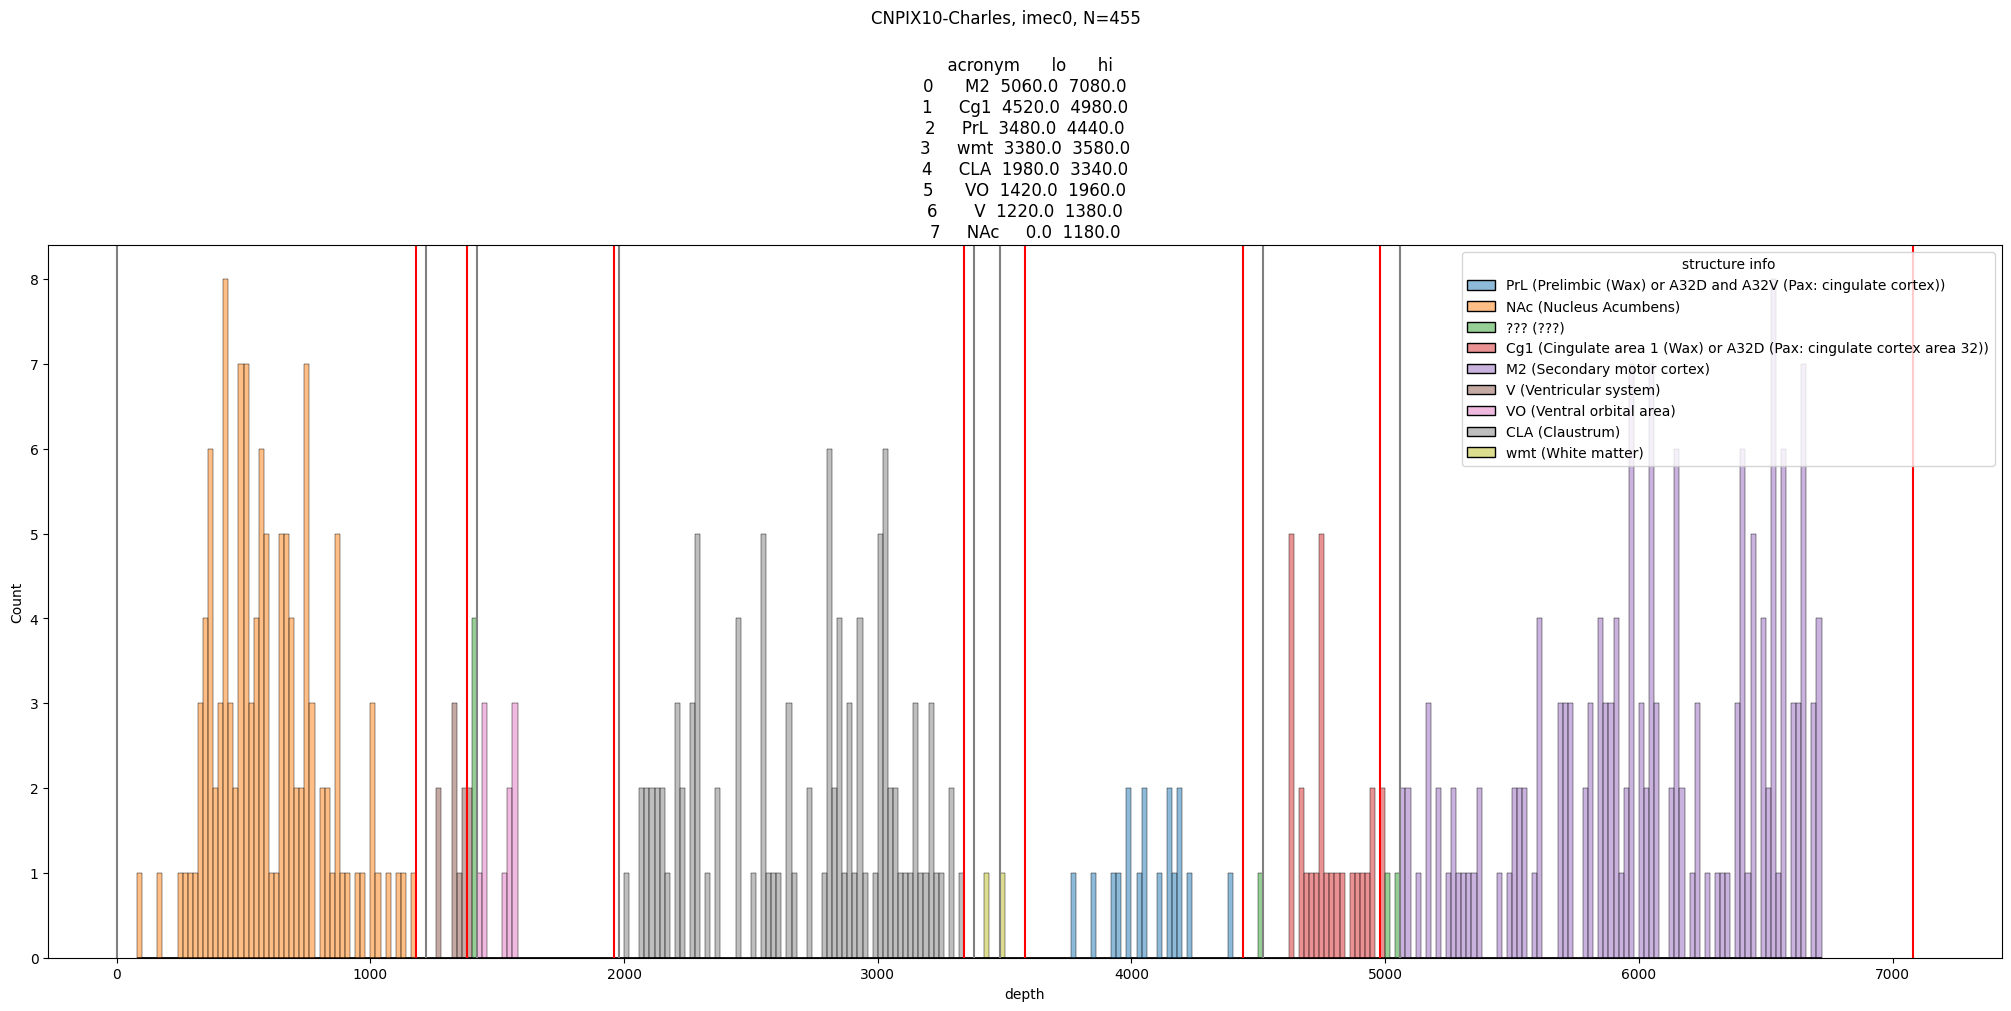

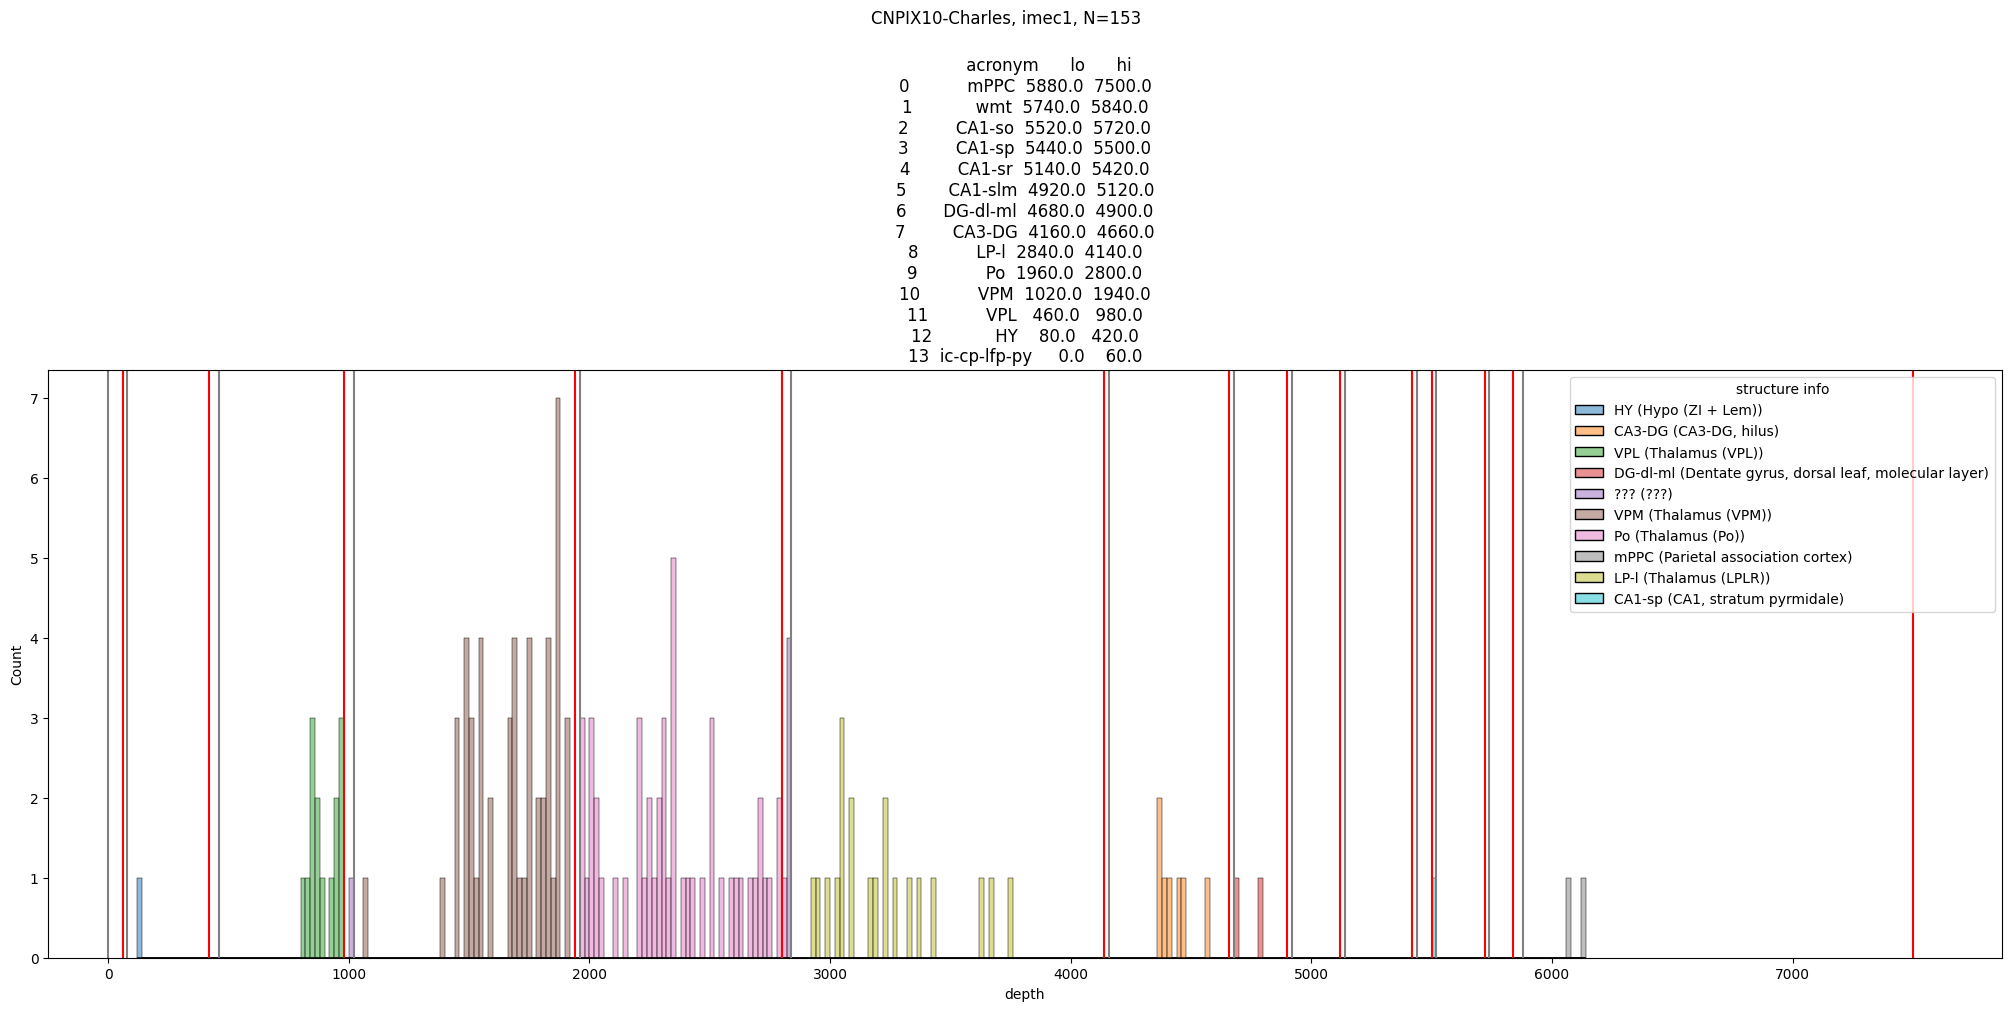

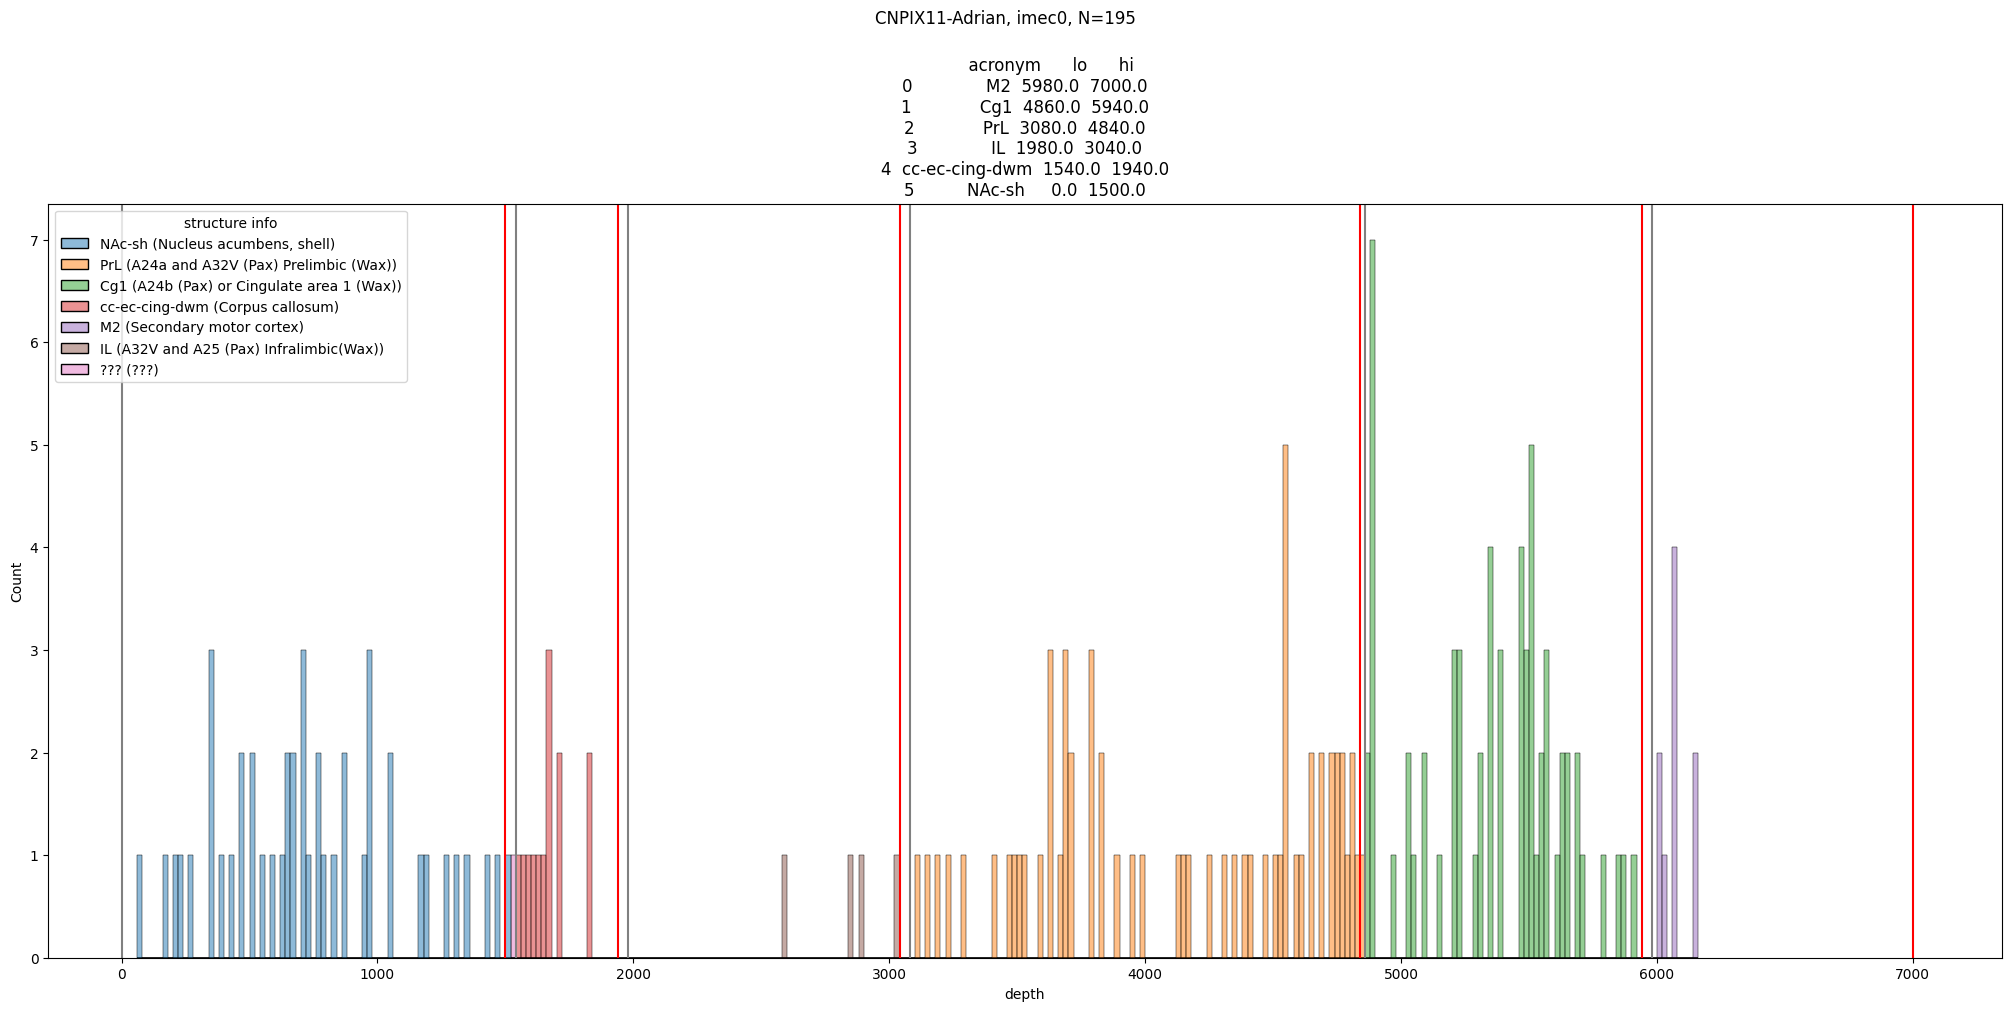

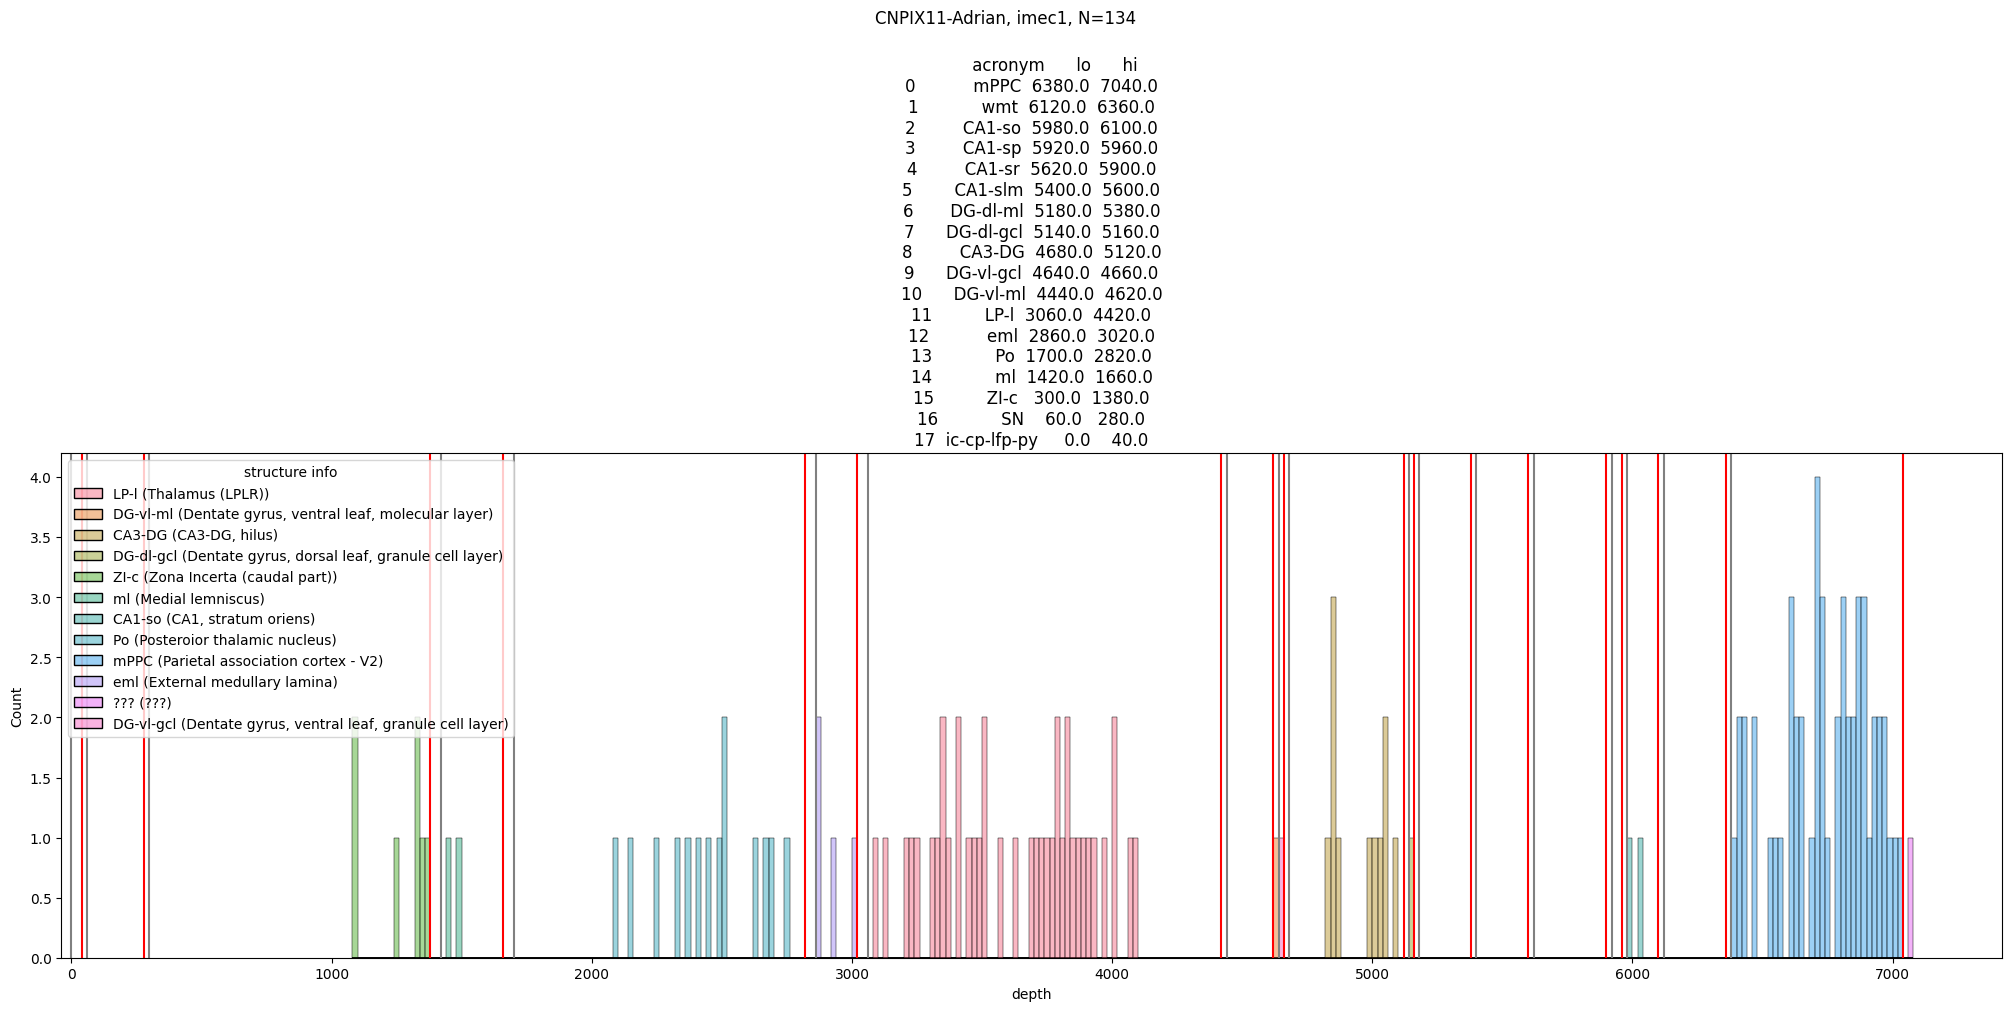

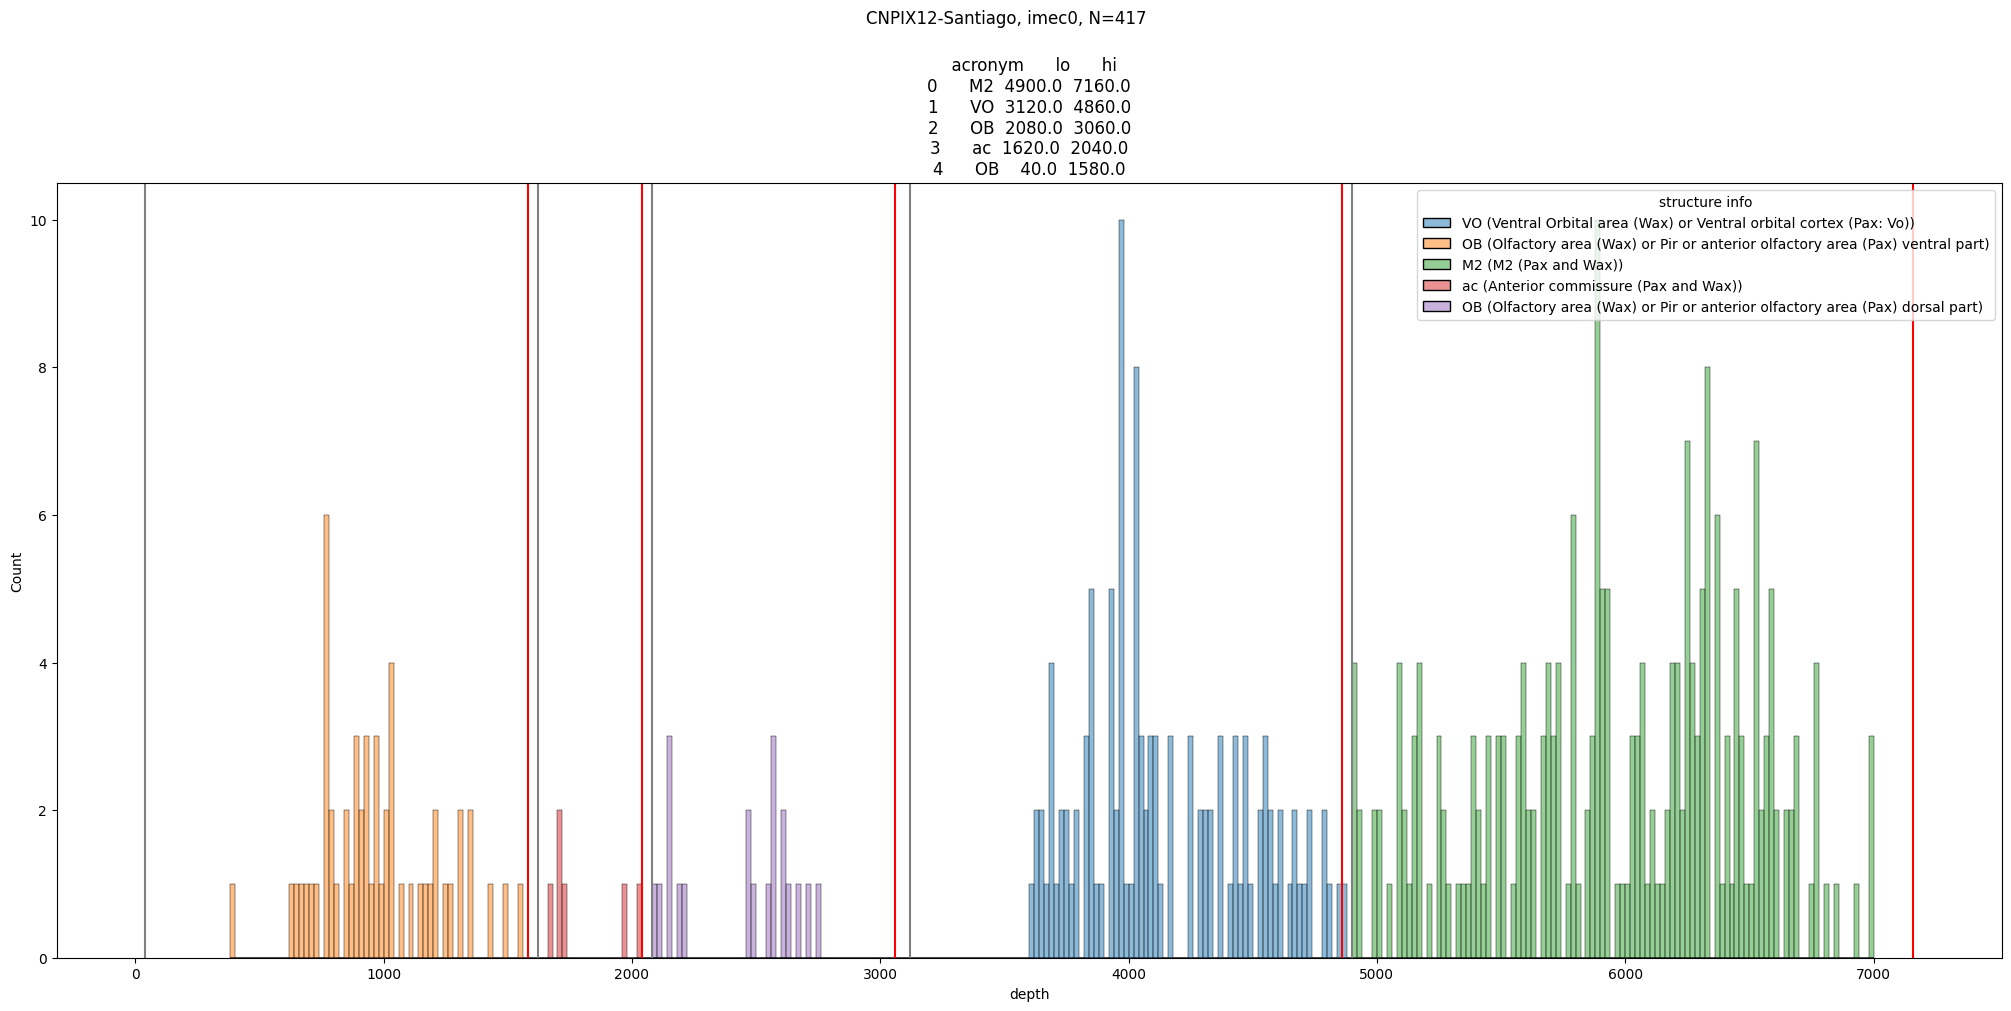

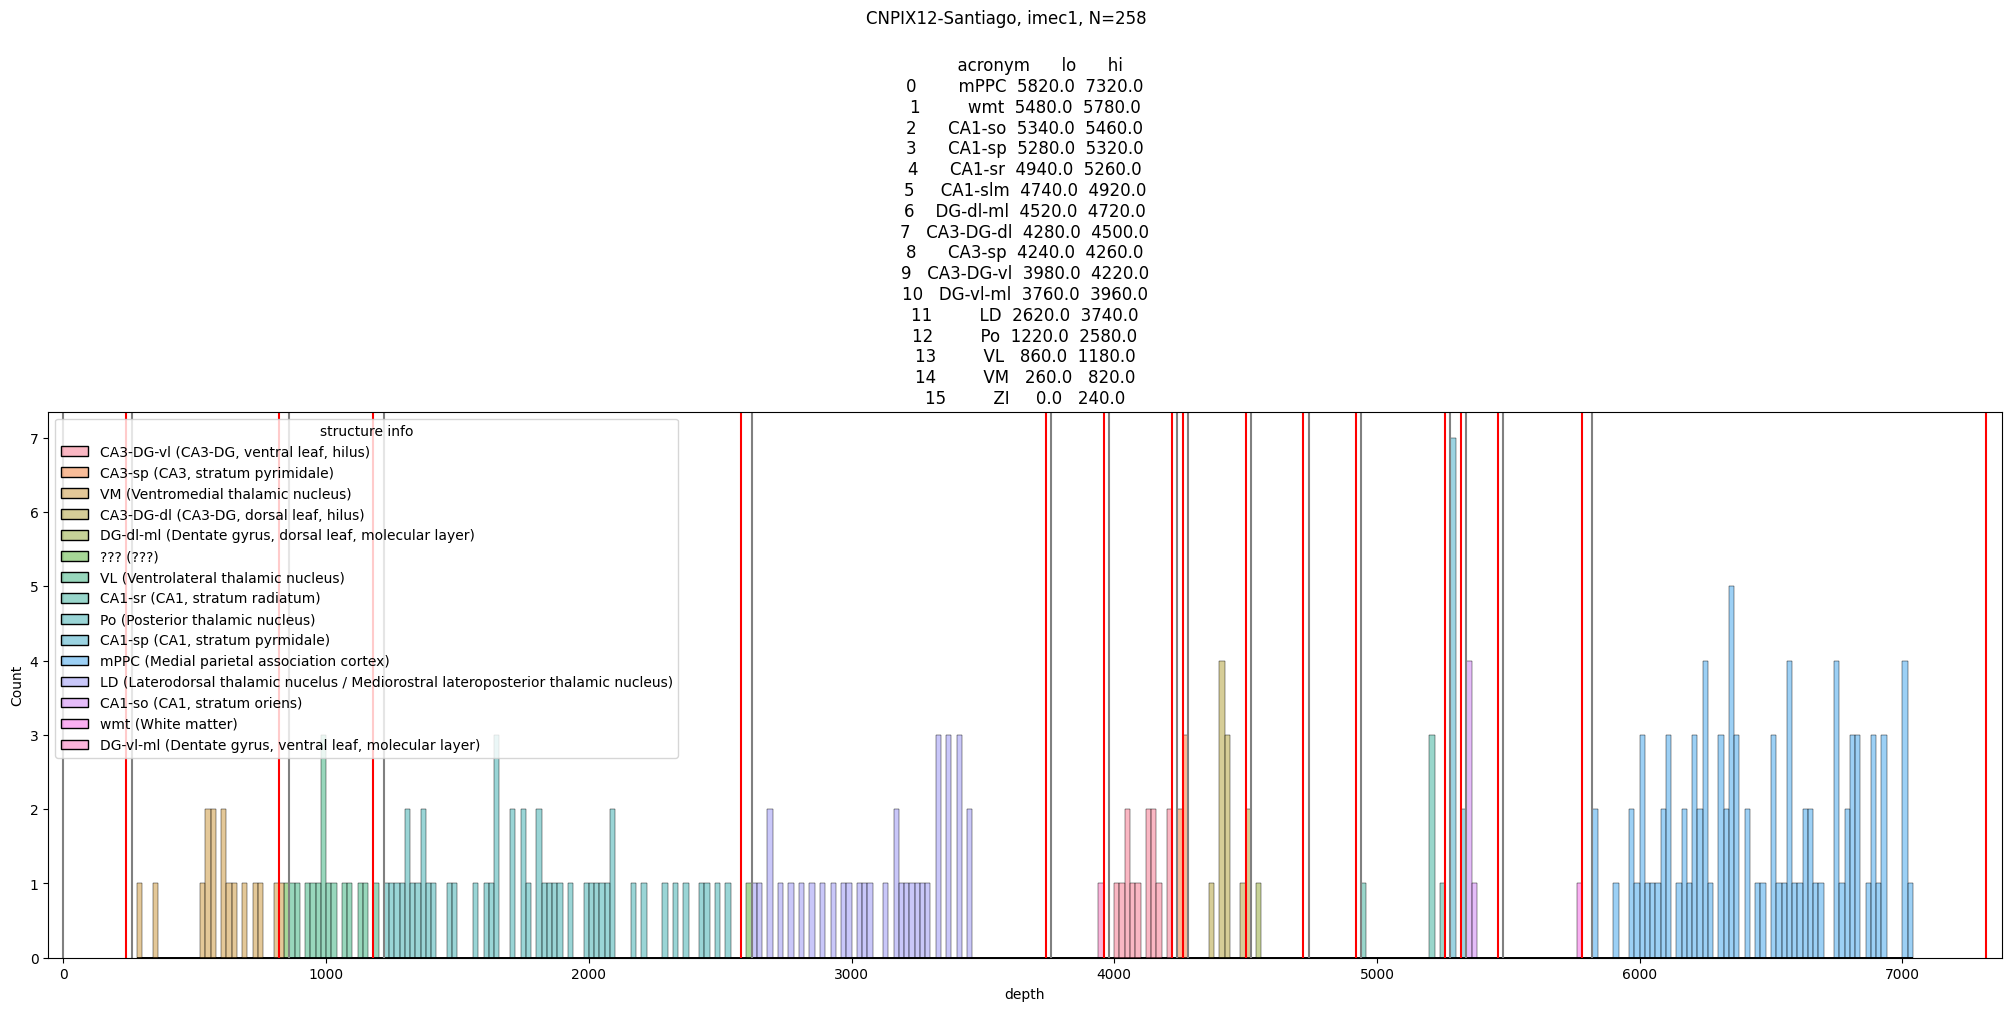

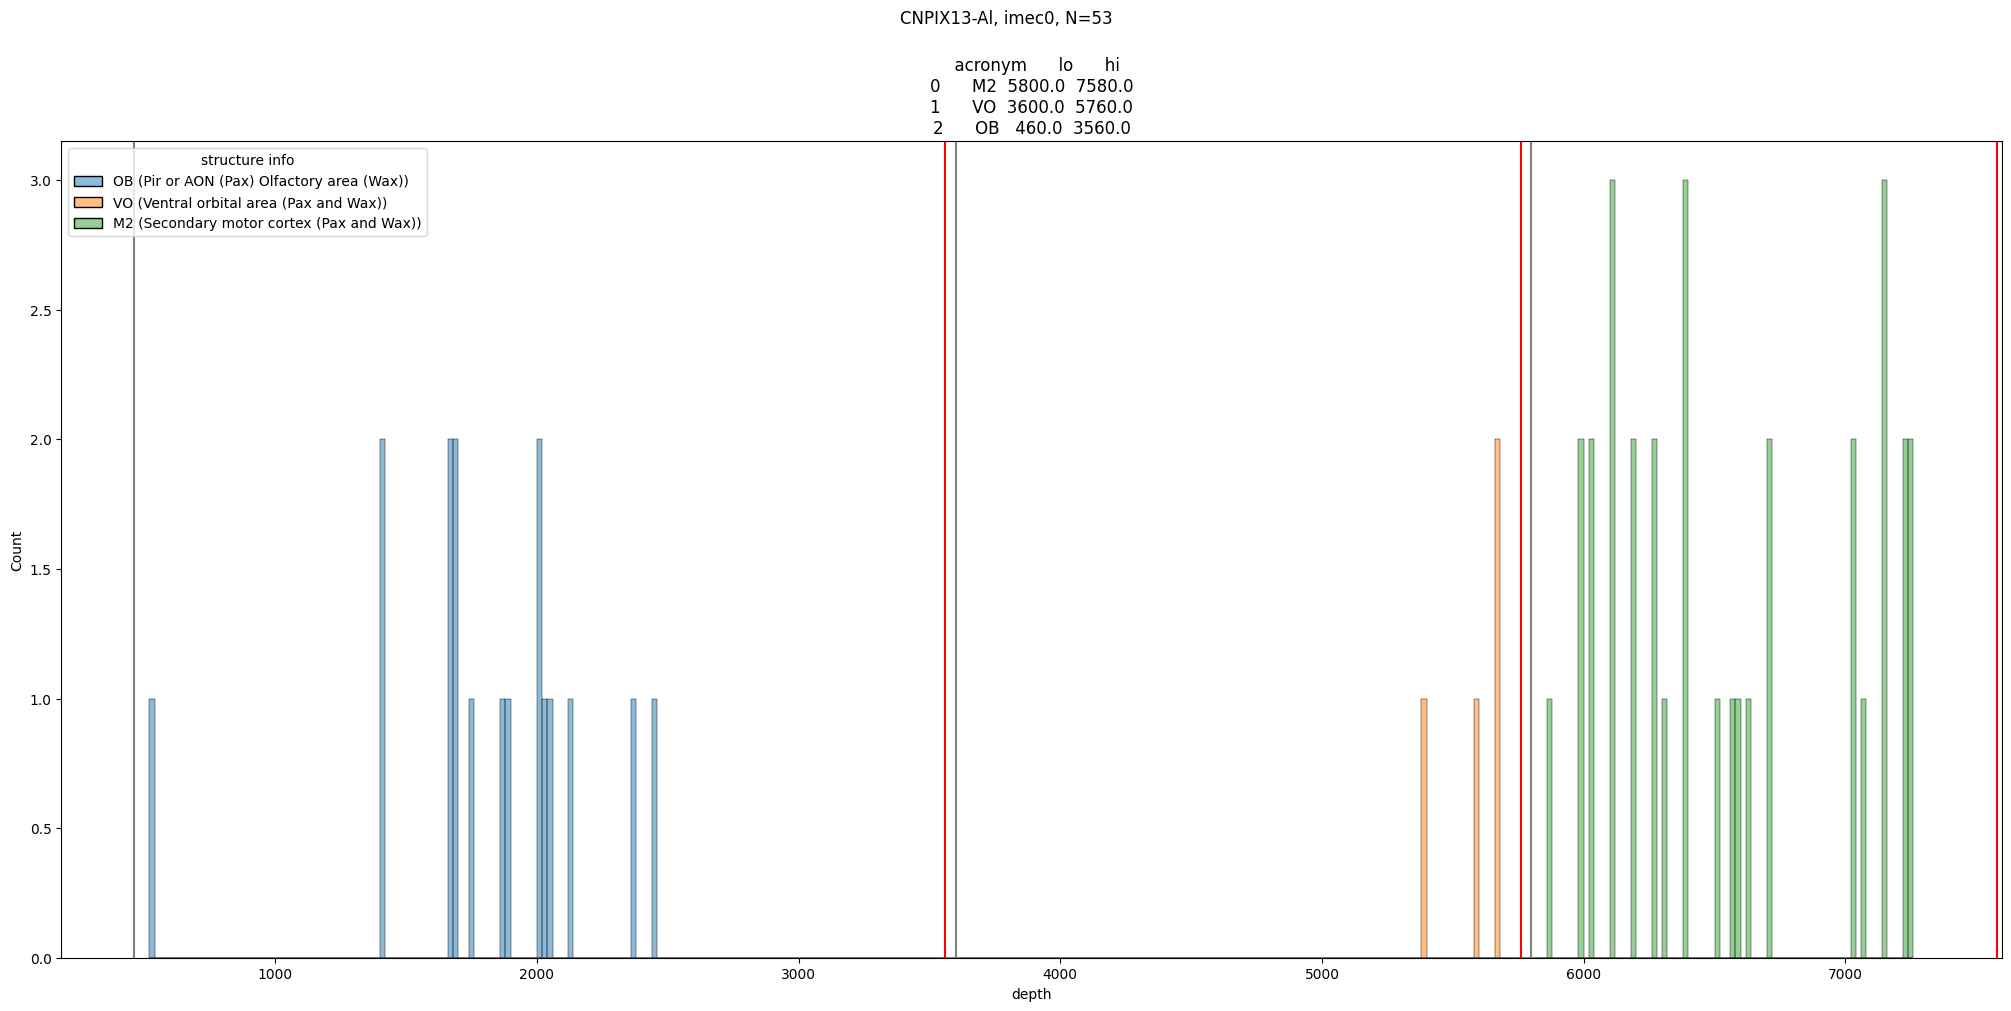

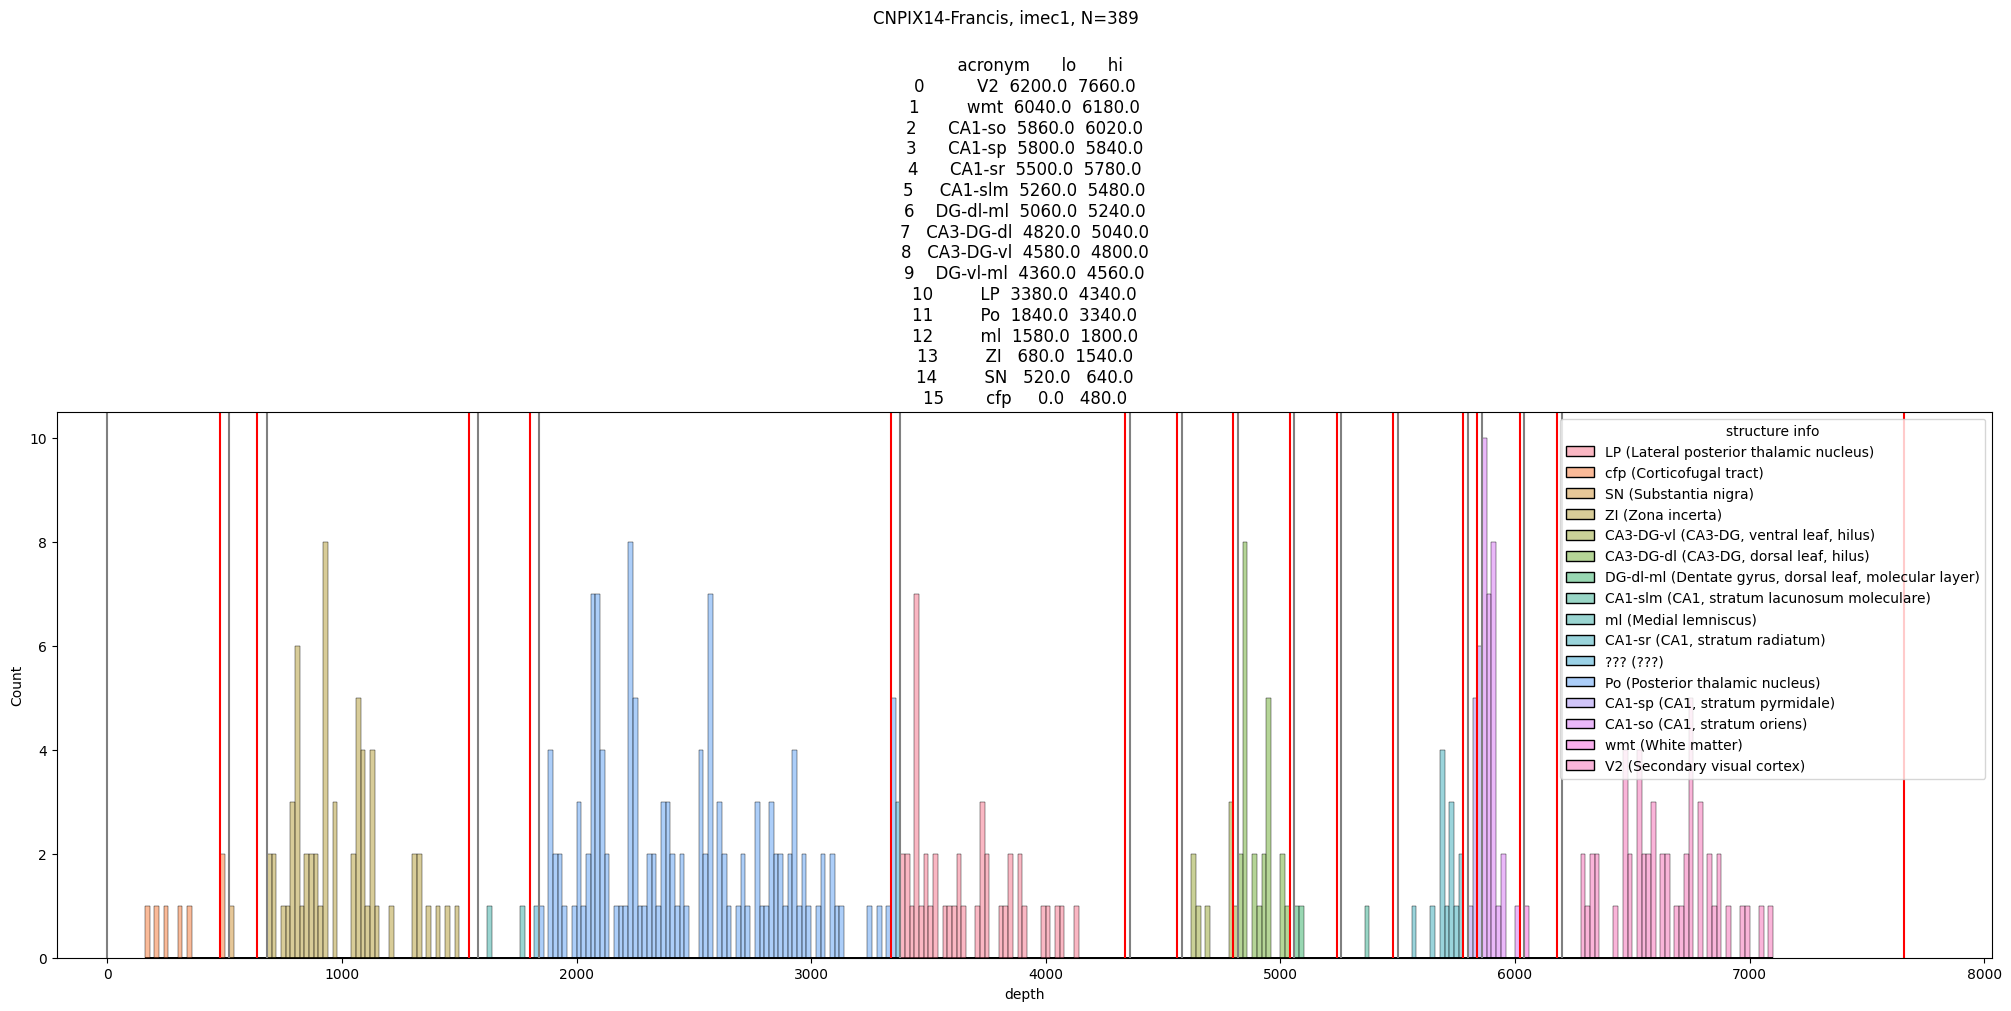

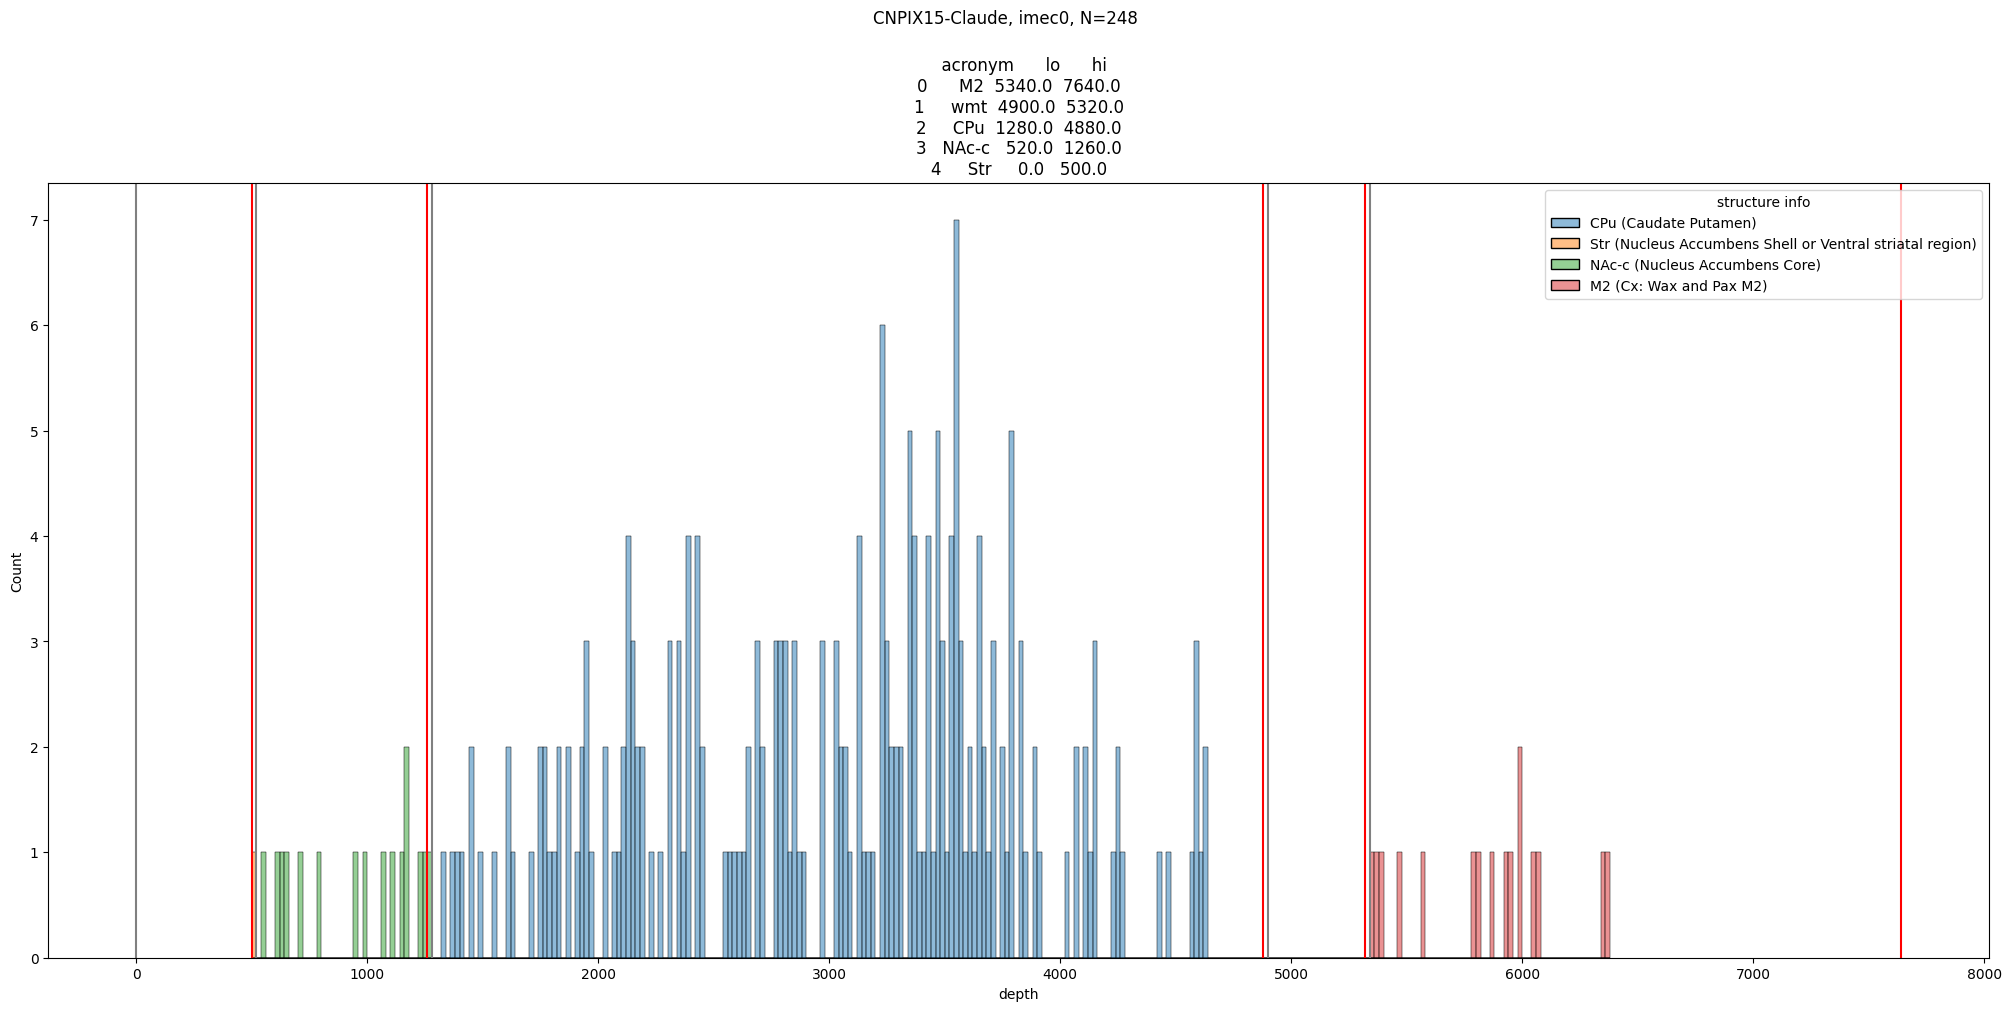

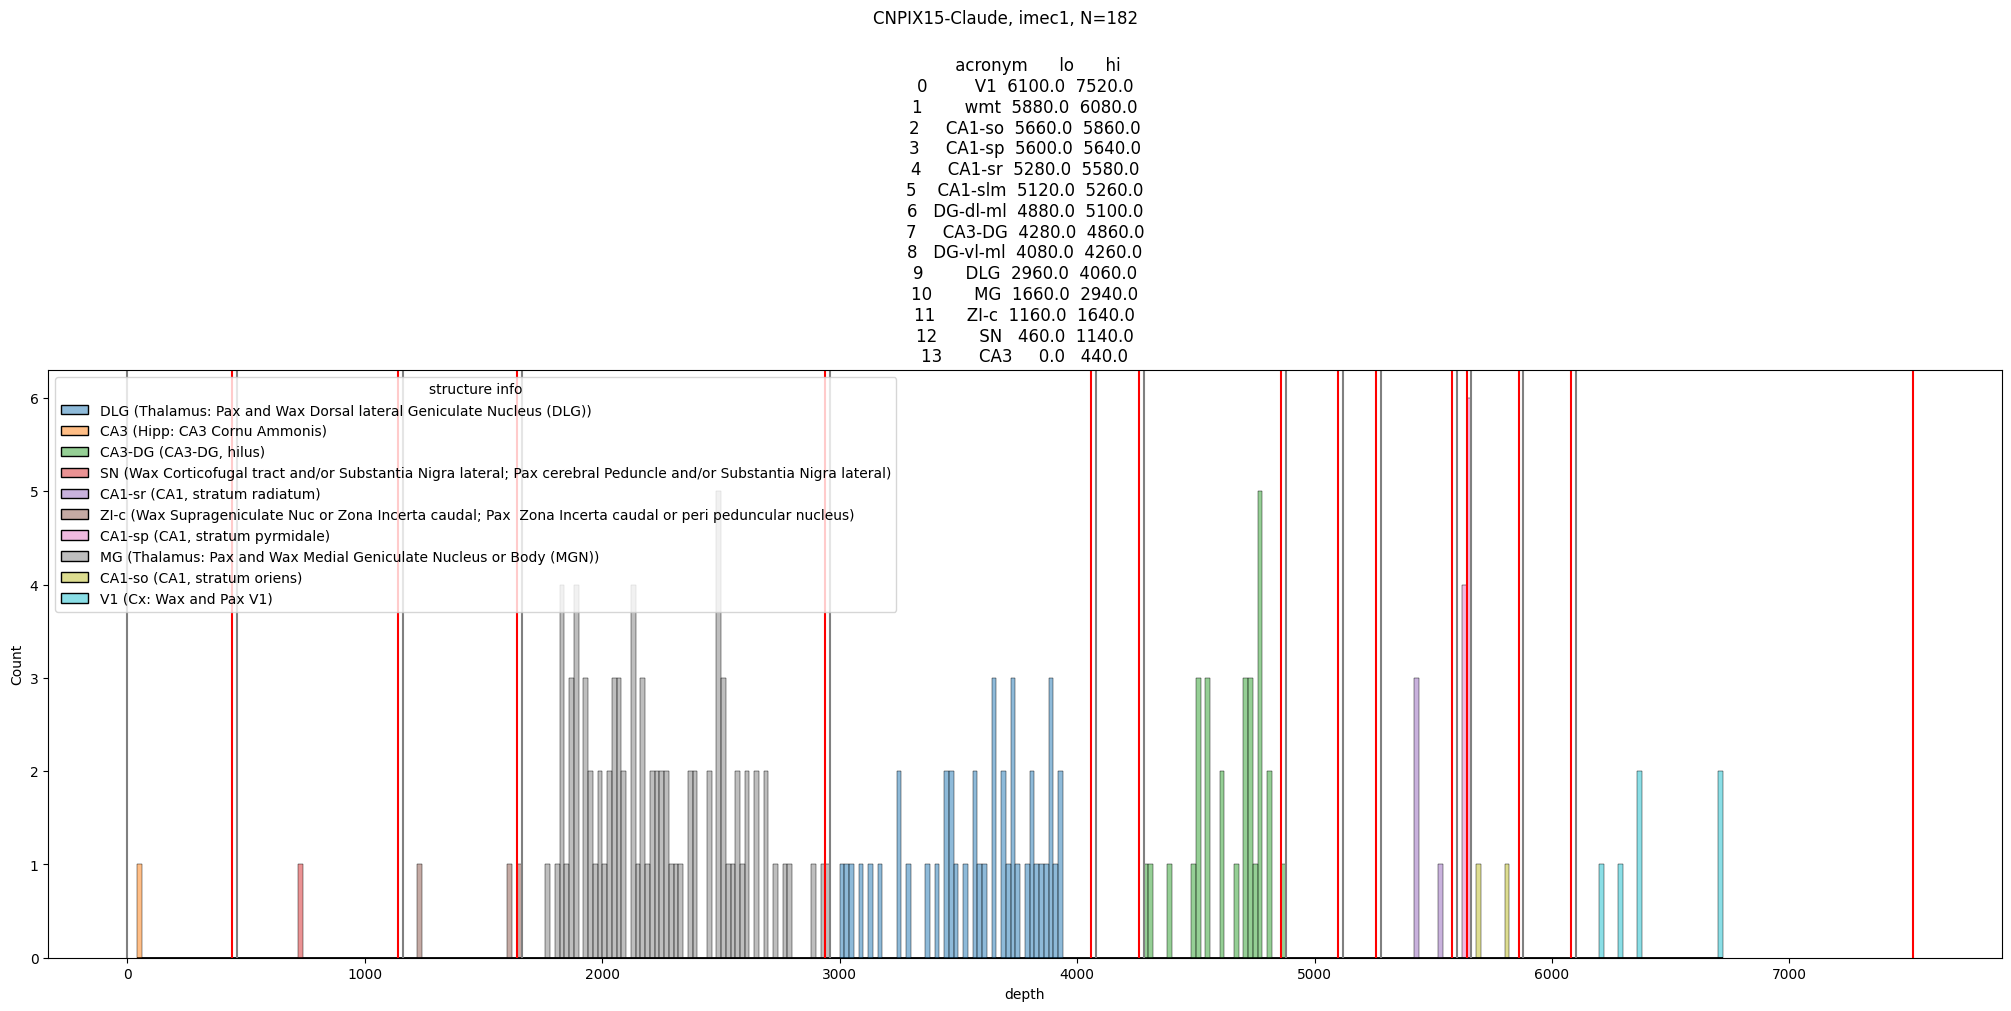

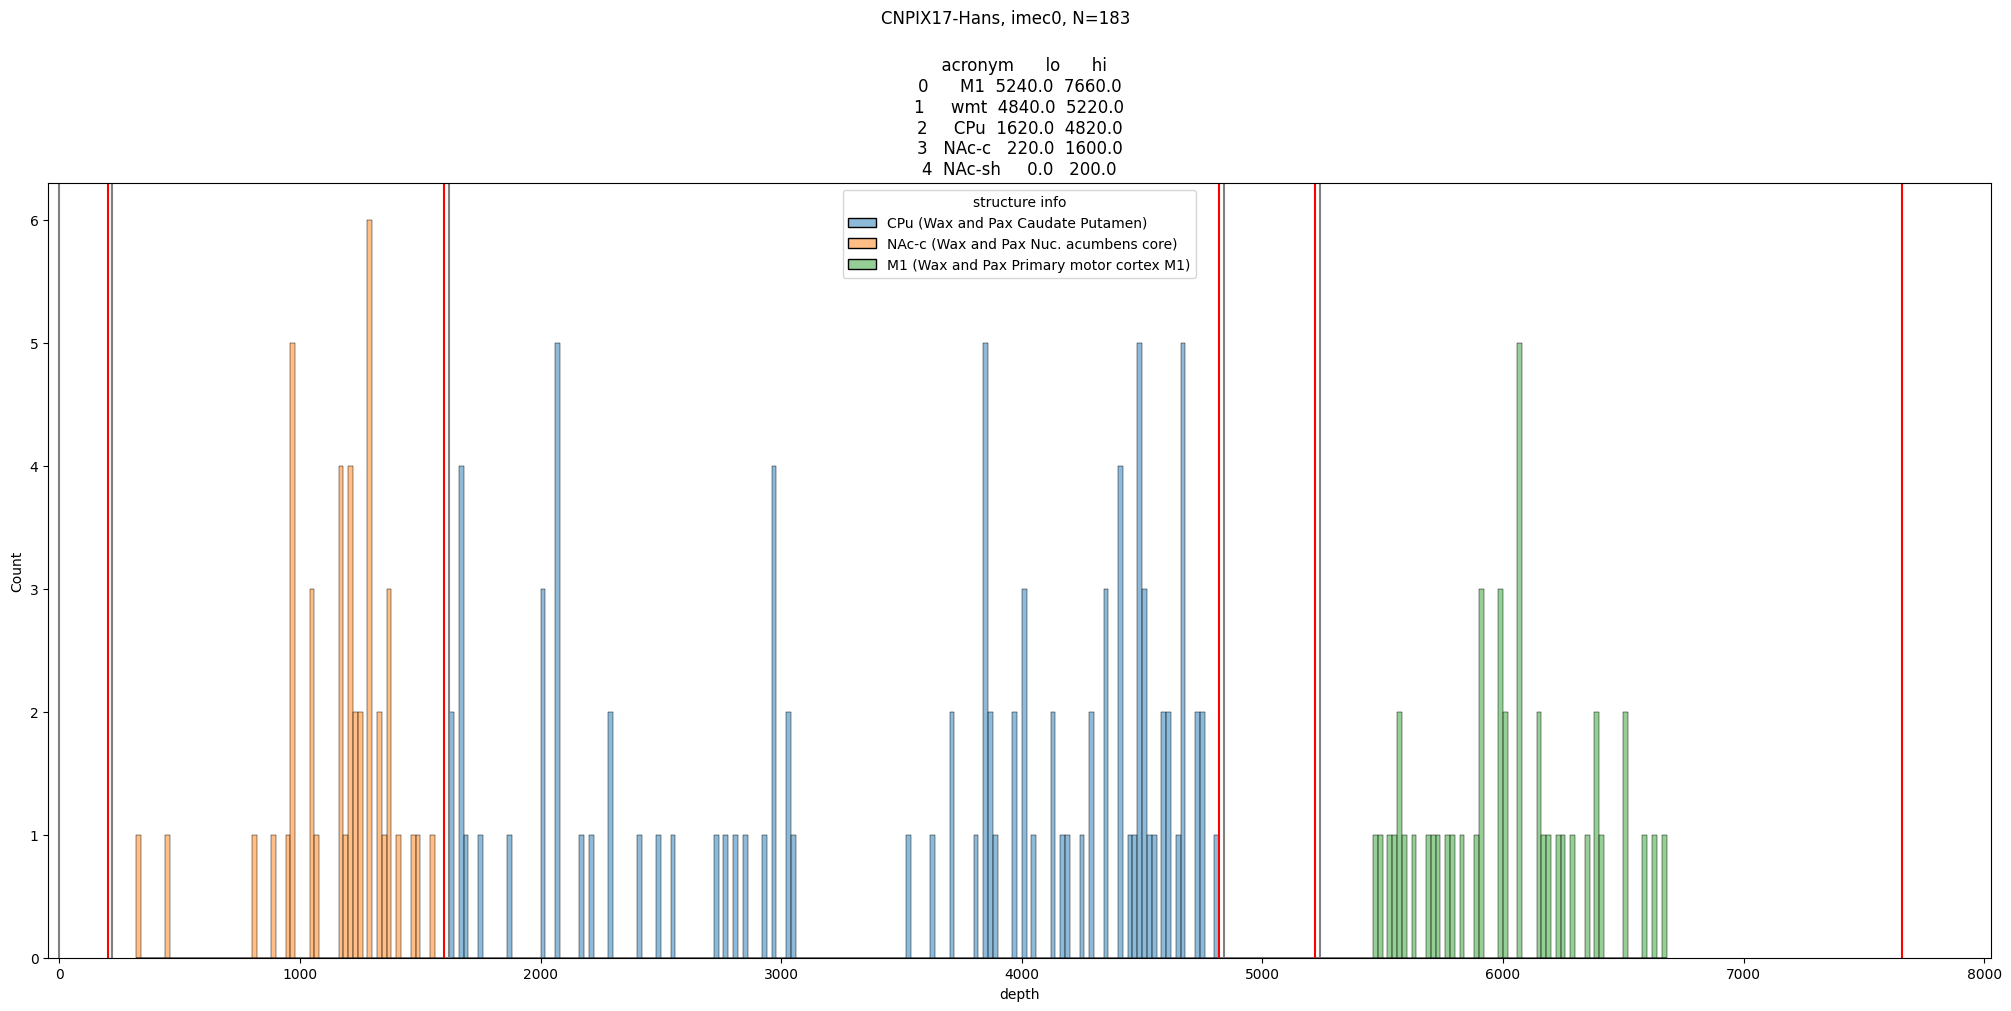

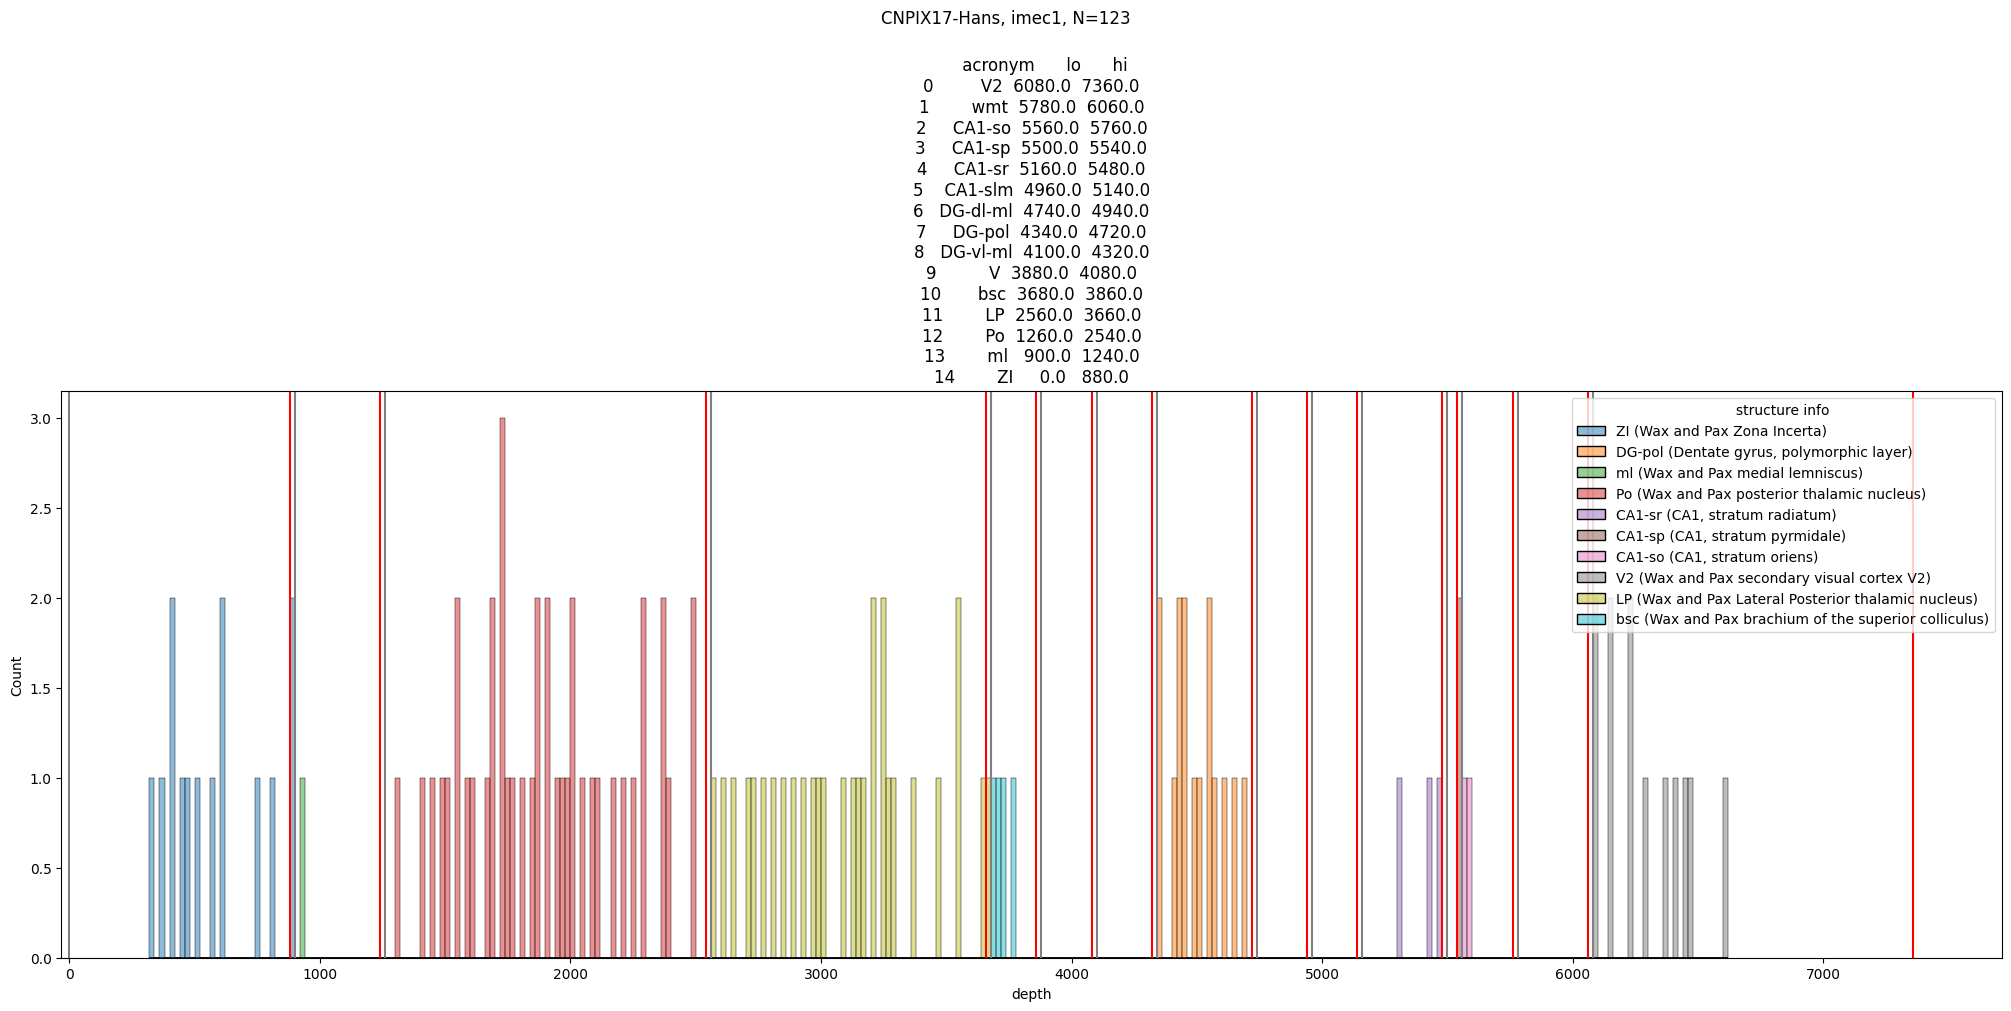

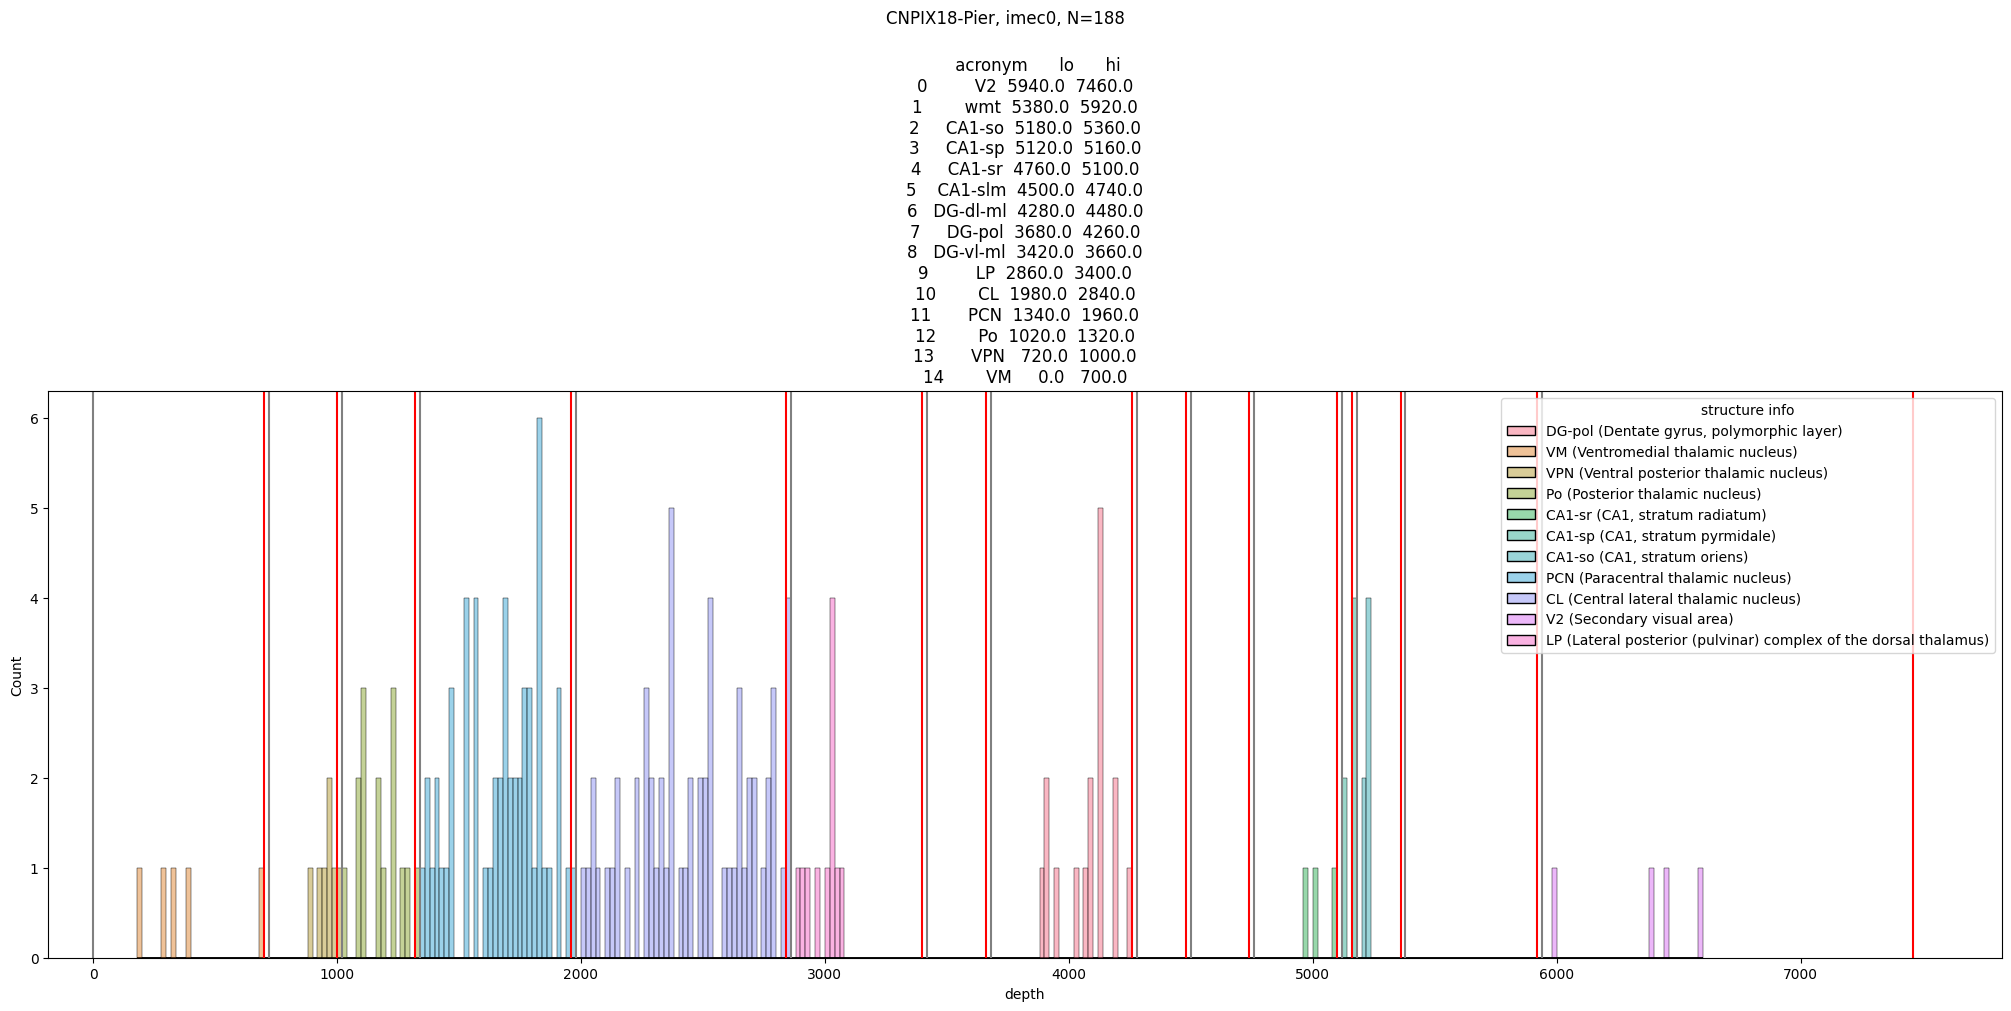

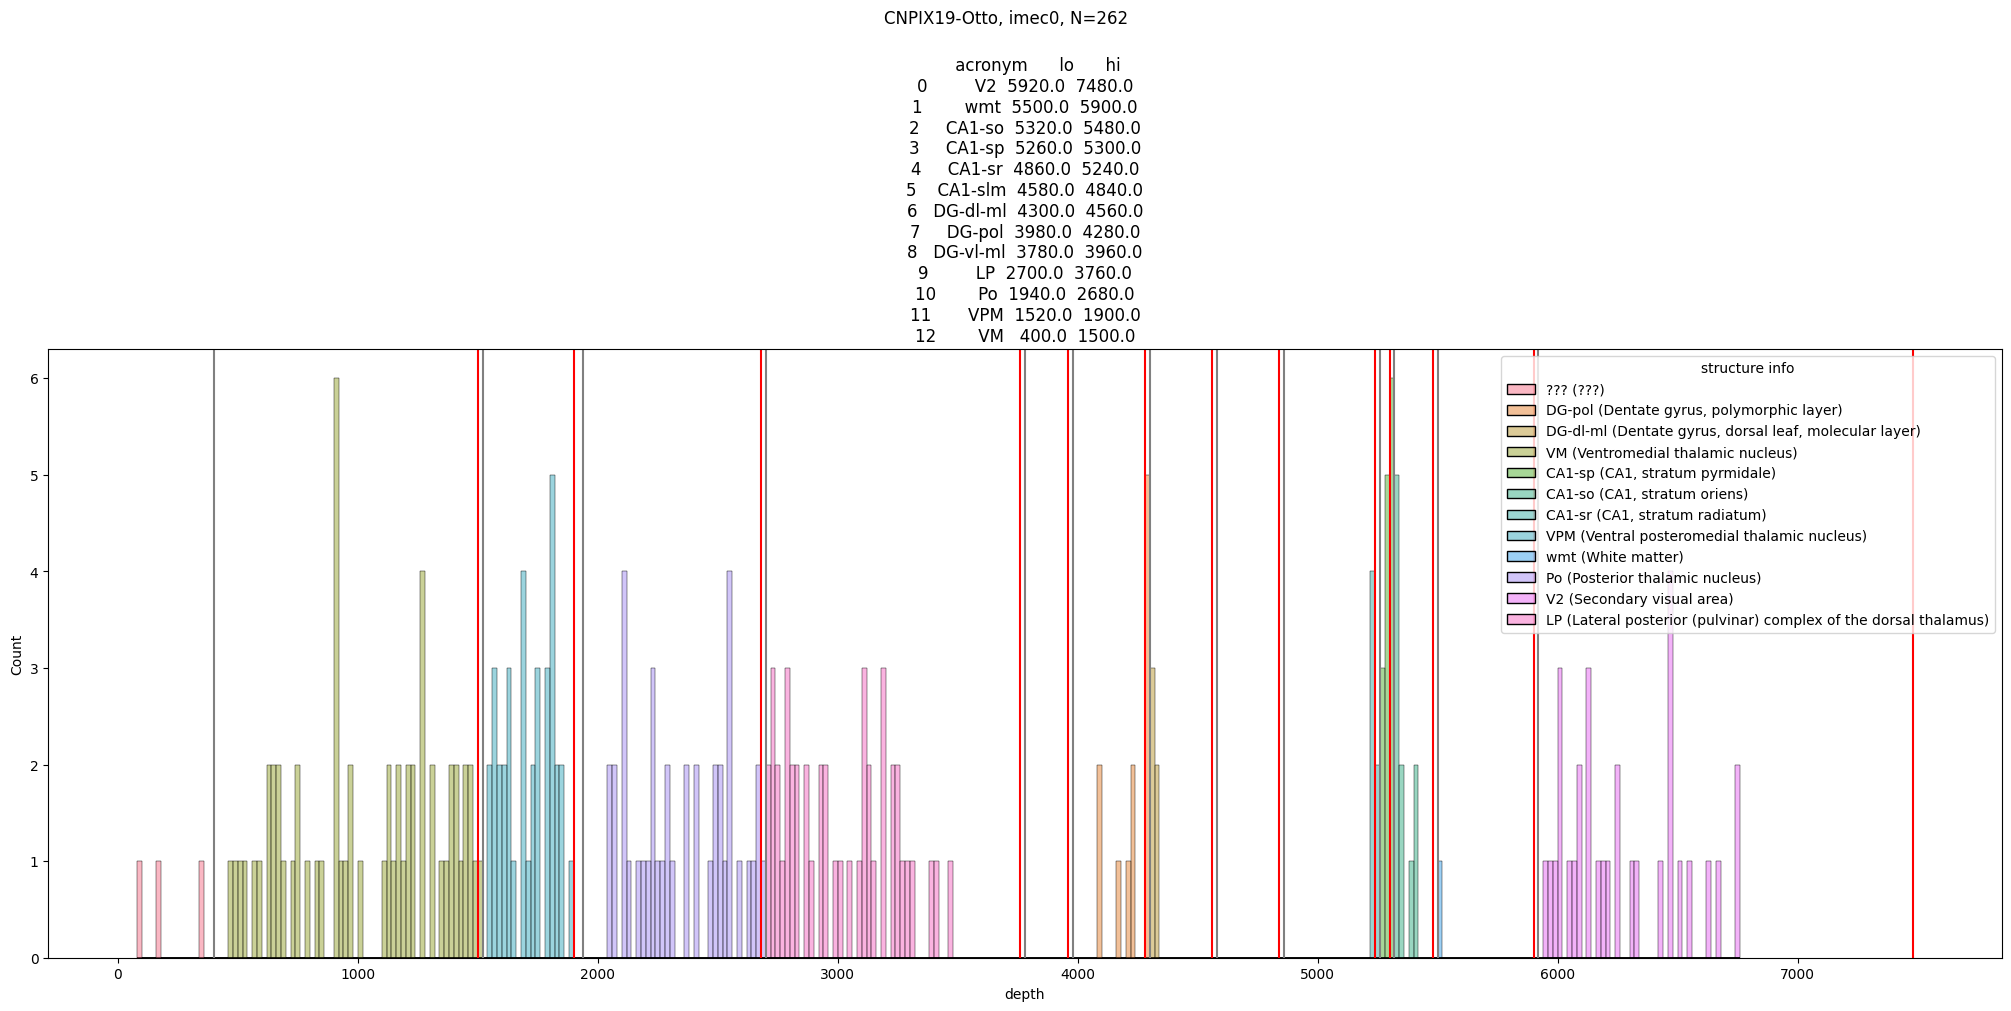

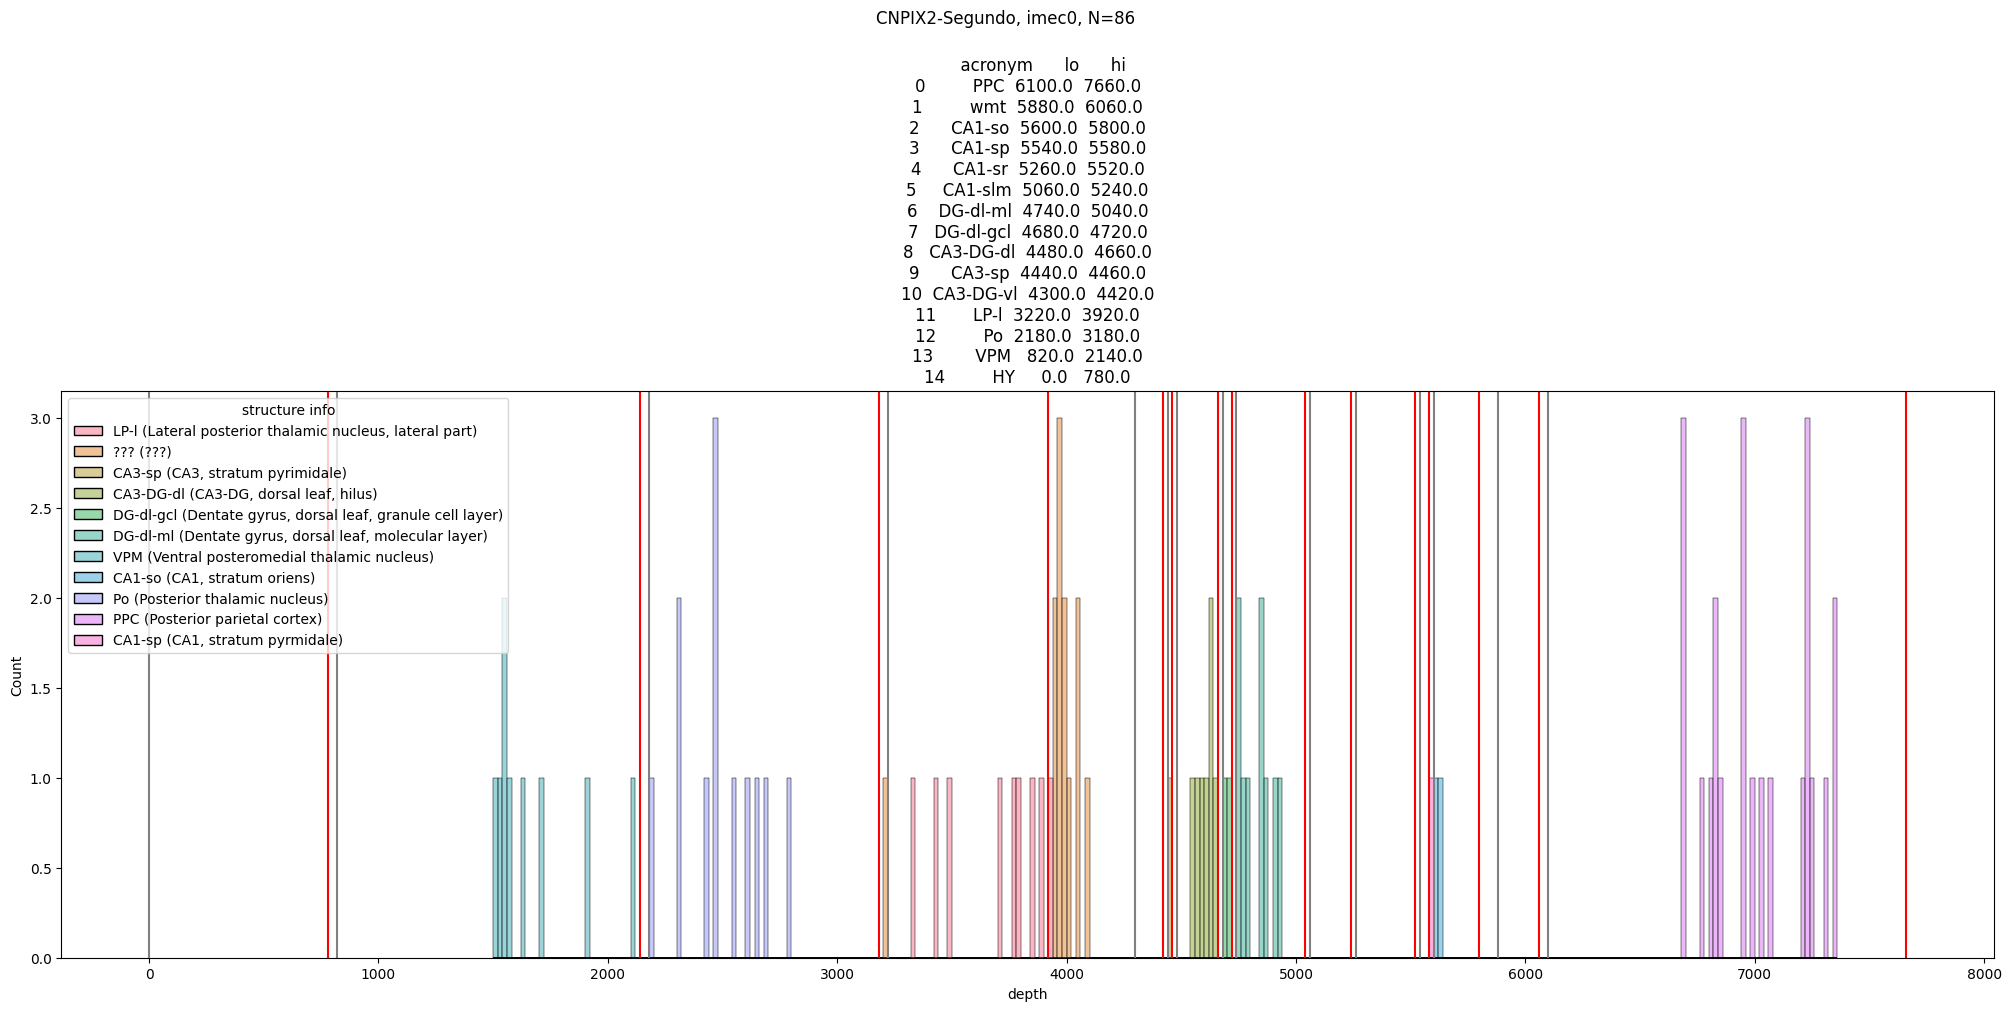

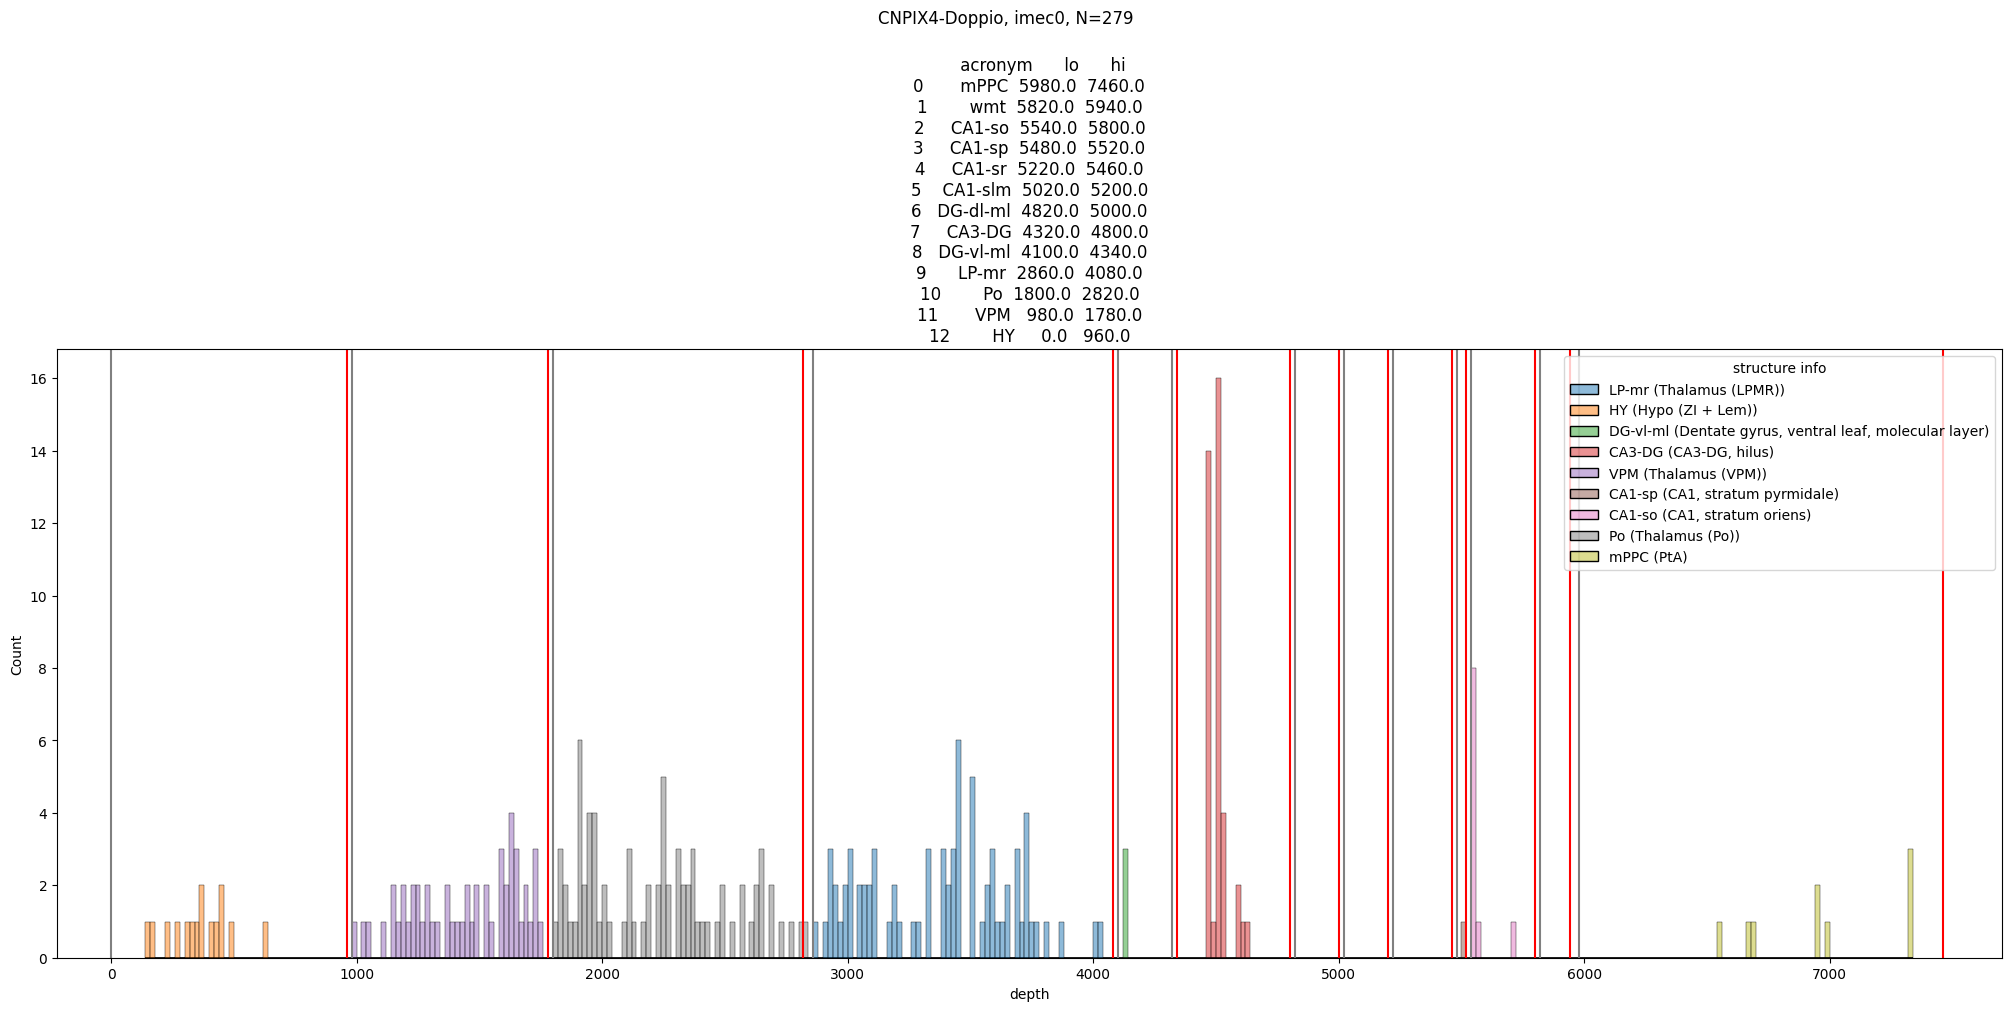

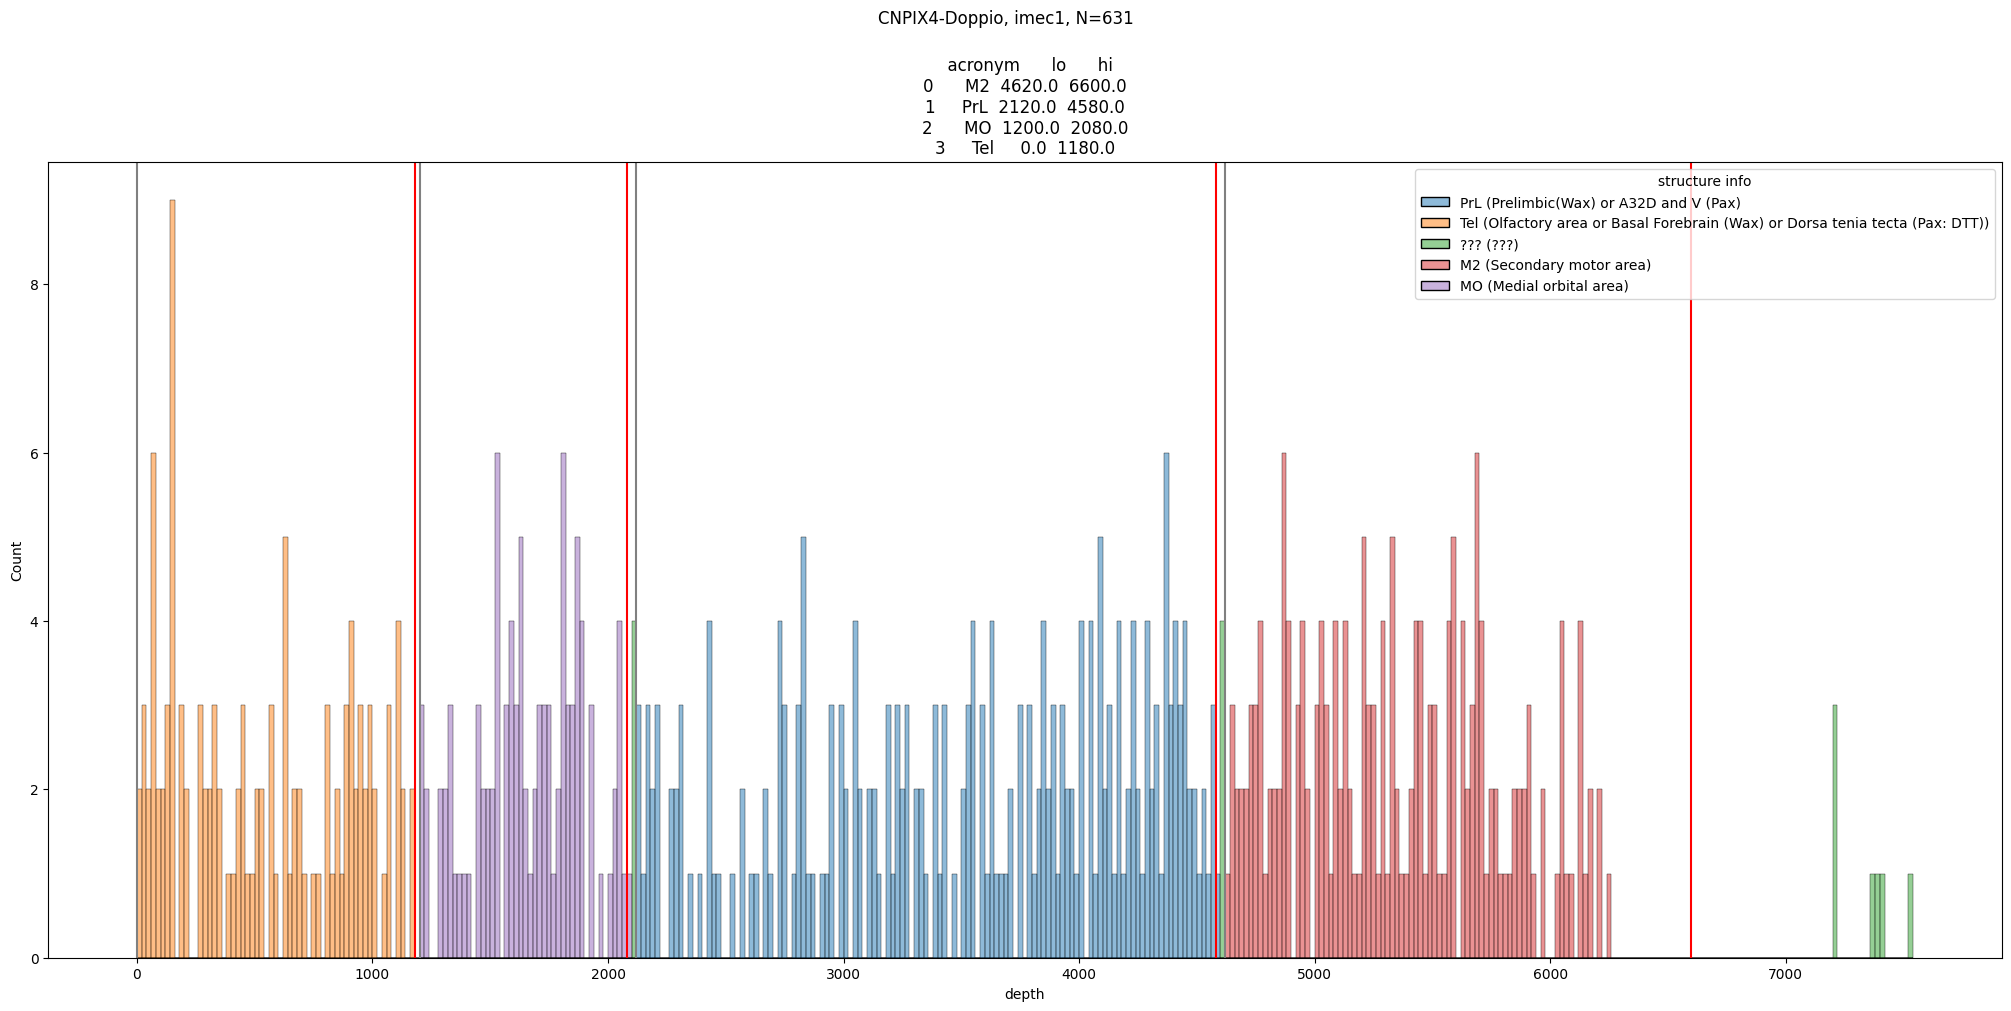

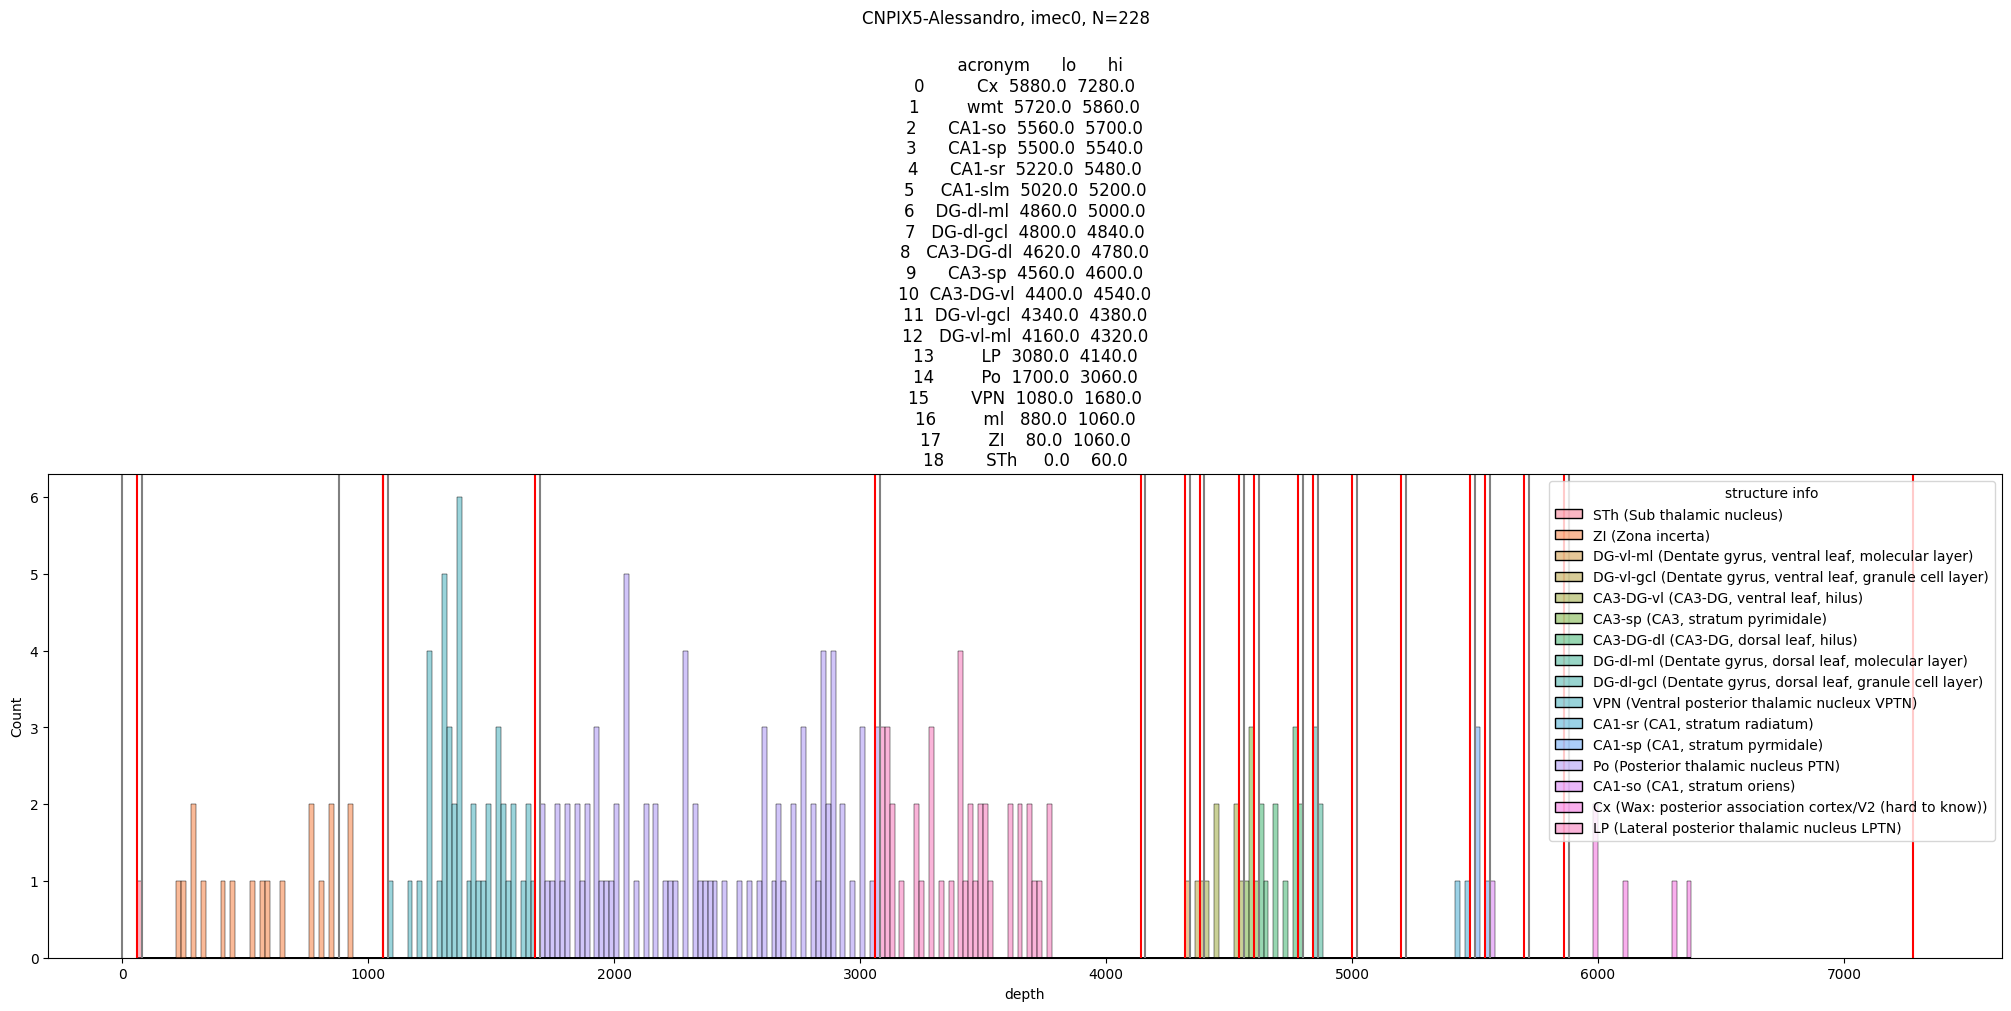

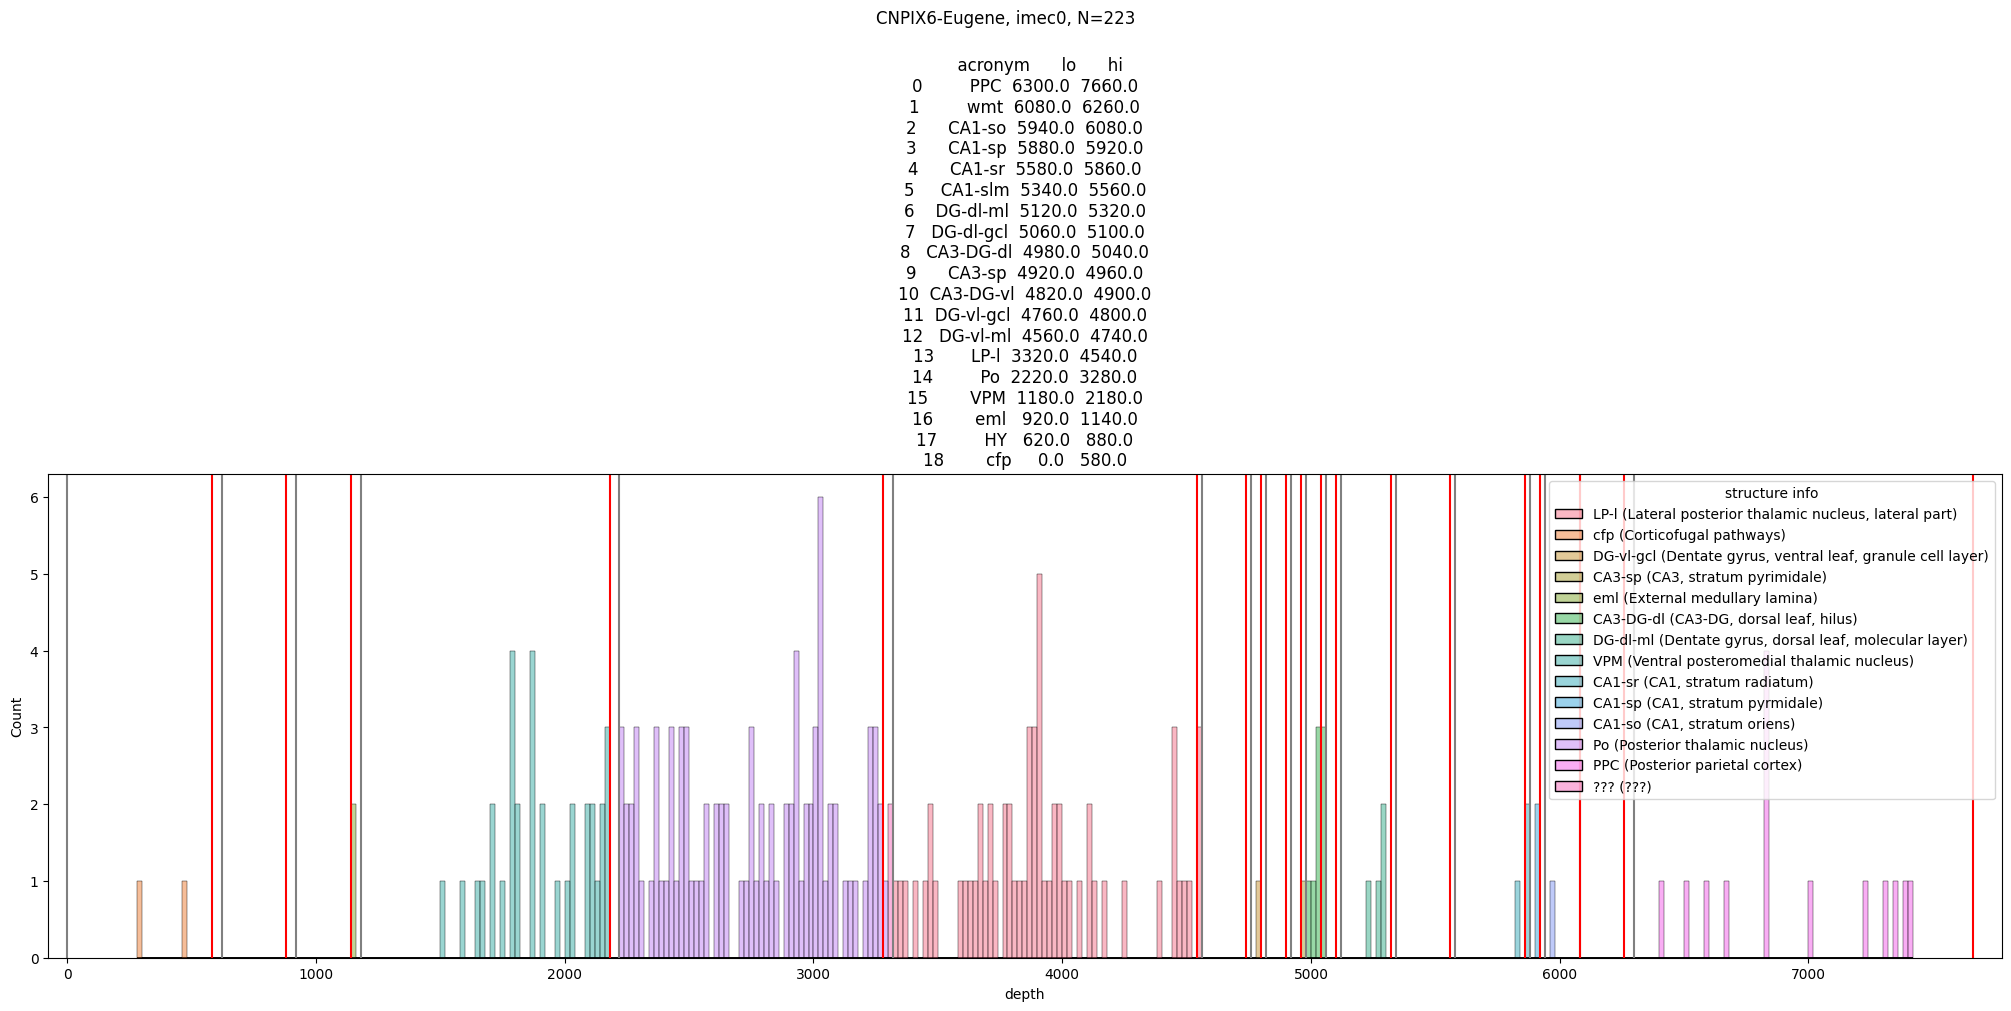

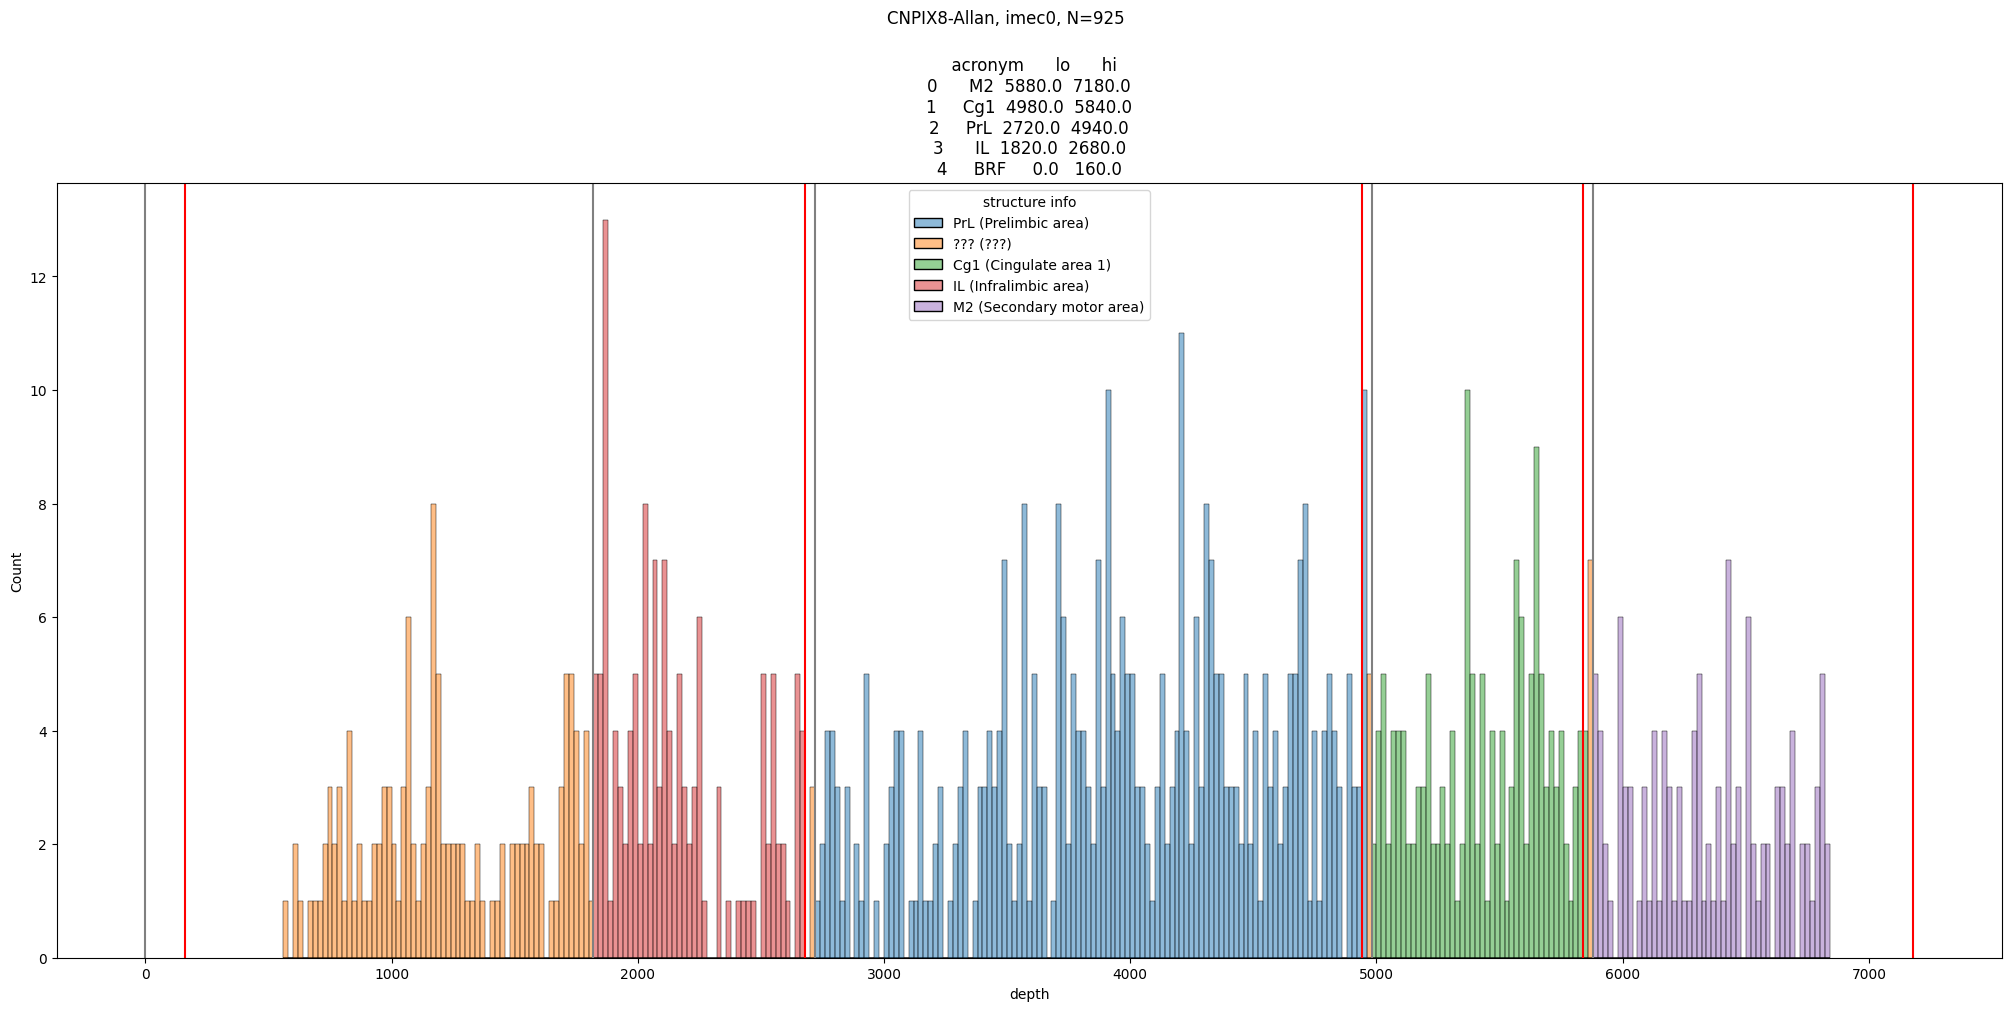

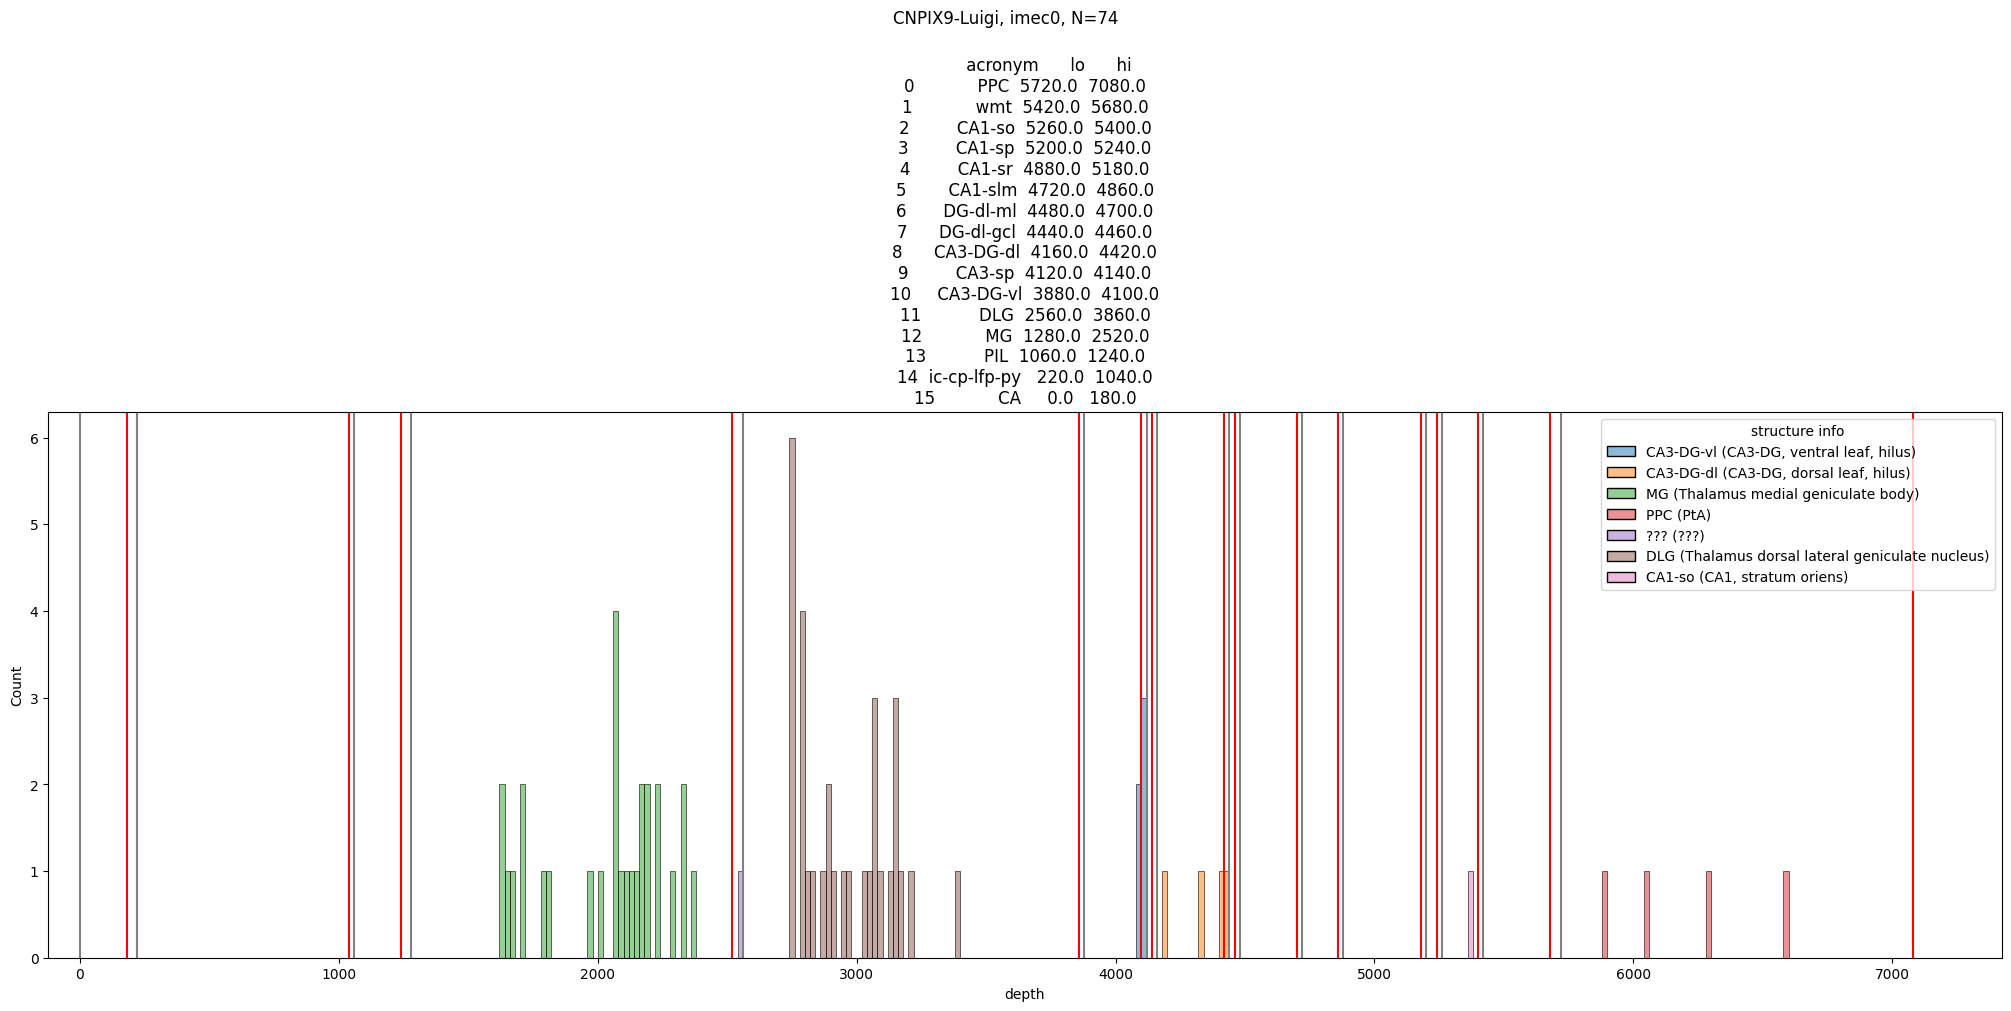

In [4]:

from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("./structures_summary.pdf") as pdf:
    for subject, probe in sorted(get_subject_probe_list("novel_objects_deprivation", "full")):
        print(subject, probe)
        fig = do_figure(subject, probe)
        fig.savefig(pdf, format="pdf")

